In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from utilsPCA import *
from plotting import *
from efficiency import *

import matplotlib as mpl

mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('axes', labelsize=16, titlesize=20)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
C = 29.9792458 #cm/ns

In [3]:
filename = 'root_files/histo_SinglePi_3LC.root'
#filename = 'root_files/histo_Felice.root'
# filename = 'root_files/histo_Felice.root'
file = uproot.open(filename)

In [4]:
file.keys()

['ticlDumper;1',
 'ticlDumper/tracksters;1',
 'ticlDumper/clusters;1',
 'ticlDumper/graph;1',
 'ticlDumper/candidates;1',
 'ticlDumper/trackstersMerged;1',
 'ticlDumper/associations;1',
 'ticlDumper/simtrackstersSC;1',
 'ticlDumper/simtrackstersCP;1',
 'ticlDumper/tracks;1',
 'ticlDumper/simTICLCandidate;1']

In [5]:
simtrackstersSC = file["ticlDumper/simtrackstersSC"]
simtrackstersCP = file["ticlDumper/simtrackstersCP"]
tracksters  = file["ticlDumper/tracksters"]
trackstersMerged = file["ticlDumper/trackstersMerged"]
associations = file["ticlDumper/associations"]
tracks = file["ticlDumper/tracks"]
simTICLCandidate = file["ticlDumper/simTICLCandidate"]
TICLCandidate = file["ticlDumper/candidates"]
clusters = file["ticlDumper/clusters"]

In [6]:
trackstersMerged.keys()

['event',
 'NTracksters',
 'time',
 'timeError',
 't0Mtd',
 't0MtdError',
 'tMtd',
 'tMtdError',
 'speedMtd',
 'tMtdPos',
 'tMtdPos/tMtdPos.theVector.theX',
 'tMtdPos/tMtdPos.theVector.theY',
 'tMtdPos/tMtdPos.theVector.theZ',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'NTrackstersMerged',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [7]:
track_pt = tracks["track_pt"].array()

In [8]:
track_id = tracks["track_id"].array()
track_boundaryX = simtrackstersSC["track_boundaryX"].array()
track_boundaryY = simtrackstersSC["track_boundaryY"].array()
track_boundaryZ = simtrackstersSC["track_boundaryZ"].array()

In [9]:
cluster_number_of_hits = clusters["cluster_number_of_hits"].array()
cluster_layer_id = clusters["cluster_layer_id"].array()
cluster_type = clusters["cluster_type"].array()

In [10]:
tracksters_in_candidate = TICLCandidate["tracksters_in_candidate"].array()
track_in_candidate      = TICLCandidate["track_in_candidate"].array()
candidate_energy        = TICLCandidate["candidate_energy"].array()

In [11]:
recoToSim_en    = associations["Mergetstracksters_recoToSim_SC_sharedE"].array()
recoToSim_score = associations["Mergetstracksters_recoToSim_SC_score"].array()
recoToSim_index = associations["Mergetstracksters_recoToSim_SC"].array()

simToReco_en    = associations["Mergetstracksters_simToReco_SC_sharedE"].array()
simToReco_score = associations["Mergetstracksters_simToReco_SC_score"].array()
simToReco_index = associations["Mergetstracksters_simToReco_SC"].array()

In [12]:
tracksters_vx        = tracksters["vertices_x"].array()
tracksters_vy        = tracksters["vertices_y"].array()
tracksters_vz        = tracksters["vertices_z"].array()
tracksters_ve        = tracksters["vertices_energy"].array()
tracksters_vi        = tracksters["vertices_indexes"].array()
tracksters_vt        = tracksters["vertices_time"].array()
tracksters_vtErr     = tracksters["vertices_timeErr"].array()
tracksters_vm        = tracksters["vertices_multiplicity"].array()
tracksters_bx        = tracksters["barycenter_x"].array()
tracksters_by        = tracksters["barycenter_y"].array()
tracksters_bz        = tracksters["barycenter_z"].array()
tracksters_be        = tracksters["raw_energy"].array()
tracksters_CALO_time = tracksters["time"].array()
tracksters_CALO_err  = tracksters["timeError"].array()
tracksters_EVx       = tracksters["eVector0_x"].array()
tracksters_EVy       = tracksters["eVector0_y"].array()
tracksters_EVz       = tracksters["eVector0_z"].array()

In [39]:
trackstersMerged_vx          = trackstersMerged["vertices_x"].array()
trackstersMerged_vy          = trackstersMerged["vertices_y"].array()
trackstersMerged_vz          = trackstersMerged["vertices_z"].array()
trackstersMerged_ve          = trackstersMerged["vertices_energy"].array()
trackstersMerged_vi          = trackstersMerged["vertices_indexes"].array()
trackstersMerged_vt          = trackstersMerged["vertices_time"].array()
trackstersMerged_vtErr       = trackstersMerged["vertices_timeErr"].array()
trackstersMerged_vm          = trackstersMerged["vertices_multiplicity"].array()
trackstersMerged_bx          = trackstersMerged["barycenter_x"].array()
trackstersMerged_by          = trackstersMerged["barycenter_y"].array()
trackstersMerged_bz          = trackstersMerged["barycenter_z"].array()
trackstersMerged_be          = trackstersMerged["raw_energy"].array()
trackstersMerged_CALO_time   = trackstersMerged["time"].array()
trackstersMerged_CALO_err    = trackstersMerged["timeError"].array()
trackstersMerged_EVx         = trackstersMerged["eVector0_x"].array()
trackstersMerged_EVy         = trackstersMerged["eVector0_y"].array()
trackstersMerged_EVz         = trackstersMerged["eVector0_z"].array()
trackstersMerged_MTD_time    = trackstersMerged["tMtd"].array()
trackstersMerged_MTD_err     = trackstersMerged["tMtdError"].array()
trackstersMerged_MTD_speed   = trackstersMerged["speedMtd"].array()
trackstersMerged_MTD_posX    = trackstersMerged["tMtdPos/tMtdPos.theVector.theX"].array()
trackstersMerged_MTD_posY    = trackstersMerged["tMtdPos/tMtdPos.theVector.theY"].array()
trackstersMerged_MTD_posZ    = trackstersMerged["tMtdPos/tMtdPos.theVector.theZ"].array()

In [38]:
SC_boundx        = simtrackstersSC["boundaryX"].array()
SC_boundy        = simtrackstersSC["boundaryY"].array()
SC_boundz        = simtrackstersSC["boundaryZ"].array()
SC_vx            = simtrackstersSC["vertices_x"].array()
SC_vy            = simtrackstersSC["vertices_y"].array()
SC_vz            = simtrackstersSC["vertices_z"].array()
SC_ve            = simtrackstersSC["vertices_energy"].array()
SC_vi            = simtrackstersSC["vertices_indexes"].array()
SC_vt            = simtrackstersSC["vertices_time"].array()
SC_vtErr         = simtrackstersSC["vertices_timeErr"].array()
SC_vm            = simtrackstersSC["vertices_multiplicity"].array()
SC_bx            = simtrackstersSC["barycenter_x"].array()
SC_by            = simtrackstersSC["barycenter_y"].array()
SC_bz            = simtrackstersSC["barycenter_z"].array()
SC_be            = simtrackstersSC["raw_energy"].array()
SC_CALO_time     = simtrackstersSC["time"].array()
SC_CALO_err      = simtrackstersSC["timeError"].array()
SC_MTD_time      = simtrackstersSC["tMtd"].array()
SC_MTD_err       = simtrackstersSC["tMtdError"].array()
SC_MTD_simTime   = simtrackstersSC["tMtdSim"].array()
SC_MTD_speed     = simtrackstersSC["speedMtd"].array()
SC_MTD_simPosX   = simtrackstersSC["tMtdPos/tMtdPos.theVector.theX"].array()
SC_MTD_simPosY   = simtrackstersSC["tMtdPos/tMtdPos.theVector.theY"].array()
SC_MTD_simPosZ   = simtrackstersSC["tMtdPos/tMtdPos.theVector.theZ"].array()
SC_trackIdx      = simtrackstersSC["trackIdx"].array()

In [ ]:
CP_boundx        = simtrackstersCP["boundaryX"].array()
CP_boundy        = simtrackstersCP["boundaryY"].array()
CP_boundz        = simtrackstersCP["boundaryZ"].array()
CP_vx            = simtrackstersCP["vertices_x"].array()
CP_vy            = simtrackstersCP["vertices_y"].array()
CP_vz            = simtrackstersCP["vertices_z"].array()
CP_ve            = simtrackstersCP["vertices_energy"].array()
CP_vi            = simtrackstersCP["vertices_indexes"].array()
CP_vt            = simtrackstersCP["vertices_time"].array()
CP_vtErr         = simtrackstersCP["vertices_timeErr"].array()
CP_vm            = simtrackstersCP["vertices_multiplicity"].array()
CP_bx            = simtrackstersCP["barycenter_x"].array()
CP_by            = simtrackstersCP["barycenter_y"].array()
CP_bz            = simtrackstersCP["barycenter_z"].array()
CP_be            = simtrackstersCP["raw_energy"].array()
CP_CALO_time     = simtrackstersCP["time"].array()
CP_CALO_err      = simtrackstersCP["timeError"].array()
CP_MTD_time      = simtrackstersCP["tMtd"].array()
CP_MTD_err       = simtrackstersCP["tMtdError"].array()
CP_MTD_simTime   = simtrackstersCP["tMtdSim"].array()
CP_MTD_speed     = simtrackstersCP["speedMtd"].array()
CP_MTD_simPosX   = simtrackstersCP["tMtdPos/tMtdPos.theVector.theX"].array()
CP_MTD_simPosY   = simtrackstersCP["tMtdPos/tMtdPos.theVector.theY"].array()
CP_MTD_simPosZ   = simtrackstersCP["tMtdPos/tMtdPos.theVector.theZ"].array()
CP_trackIdx      = simtrackstersCP["trackIdx"].array()

In [ ]:
print(f'There are {len(SC_vx)} events in the file')

In [ ]:
#events without mtd
no_mtd = 0
for i, mtd_times in enumerate(trackstersMerged_MTD_time):
    #print(mtd_times)
    t = mtd_times[mtd_times>0]
    if len(t) == 0:
        no_mtd += 1
print(no_mtd)

## visualization 

In [41]:
color = ["red", "midnightblue", "yellow", "forestgreen", "dodgerblue", "limegreen", "orange", "grey", "purple", "lightblue", "magenta", "cyan", "sienna", "lawngreen"]*10

In [42]:
# point is a list [x,y,z]

def prop_to_bar(point, z_bar):
    # Define a line by its direction vector and a point on it
    line_dir = point # direction vector of the line
    line_pt = [0, 0, 0] # a point on the line

    # Define a plane by its normal vector and a point on it
    plane_norm = [0,0,1] # normal vector of the plane
    plane_pt = [0,0,z_bar] # a point on the plane

    # Compute the dot product of the line direction and the plane normal
    dot_prod = sum([a*b for a,b in zip(line_dir, plane_norm)])

    # Check if the dot product is zero, which means the line is parallel to the plane
    if dot_prod == 0:
        print("The line is parallel to the plane. No intersection point.")
        return [0,0,0]
    else:
        # Compute the parameter t that gives the intersection point
        t = sum([(a-b)*c for a,b,c in zip(plane_pt, line_pt, plane_norm)]) / dot_prod

        # Compute the intersection point by plugging t into the line equation
        inter_pt = [a + b*t for a,b in zip(line_pt, line_dir)]

        return inter_pt

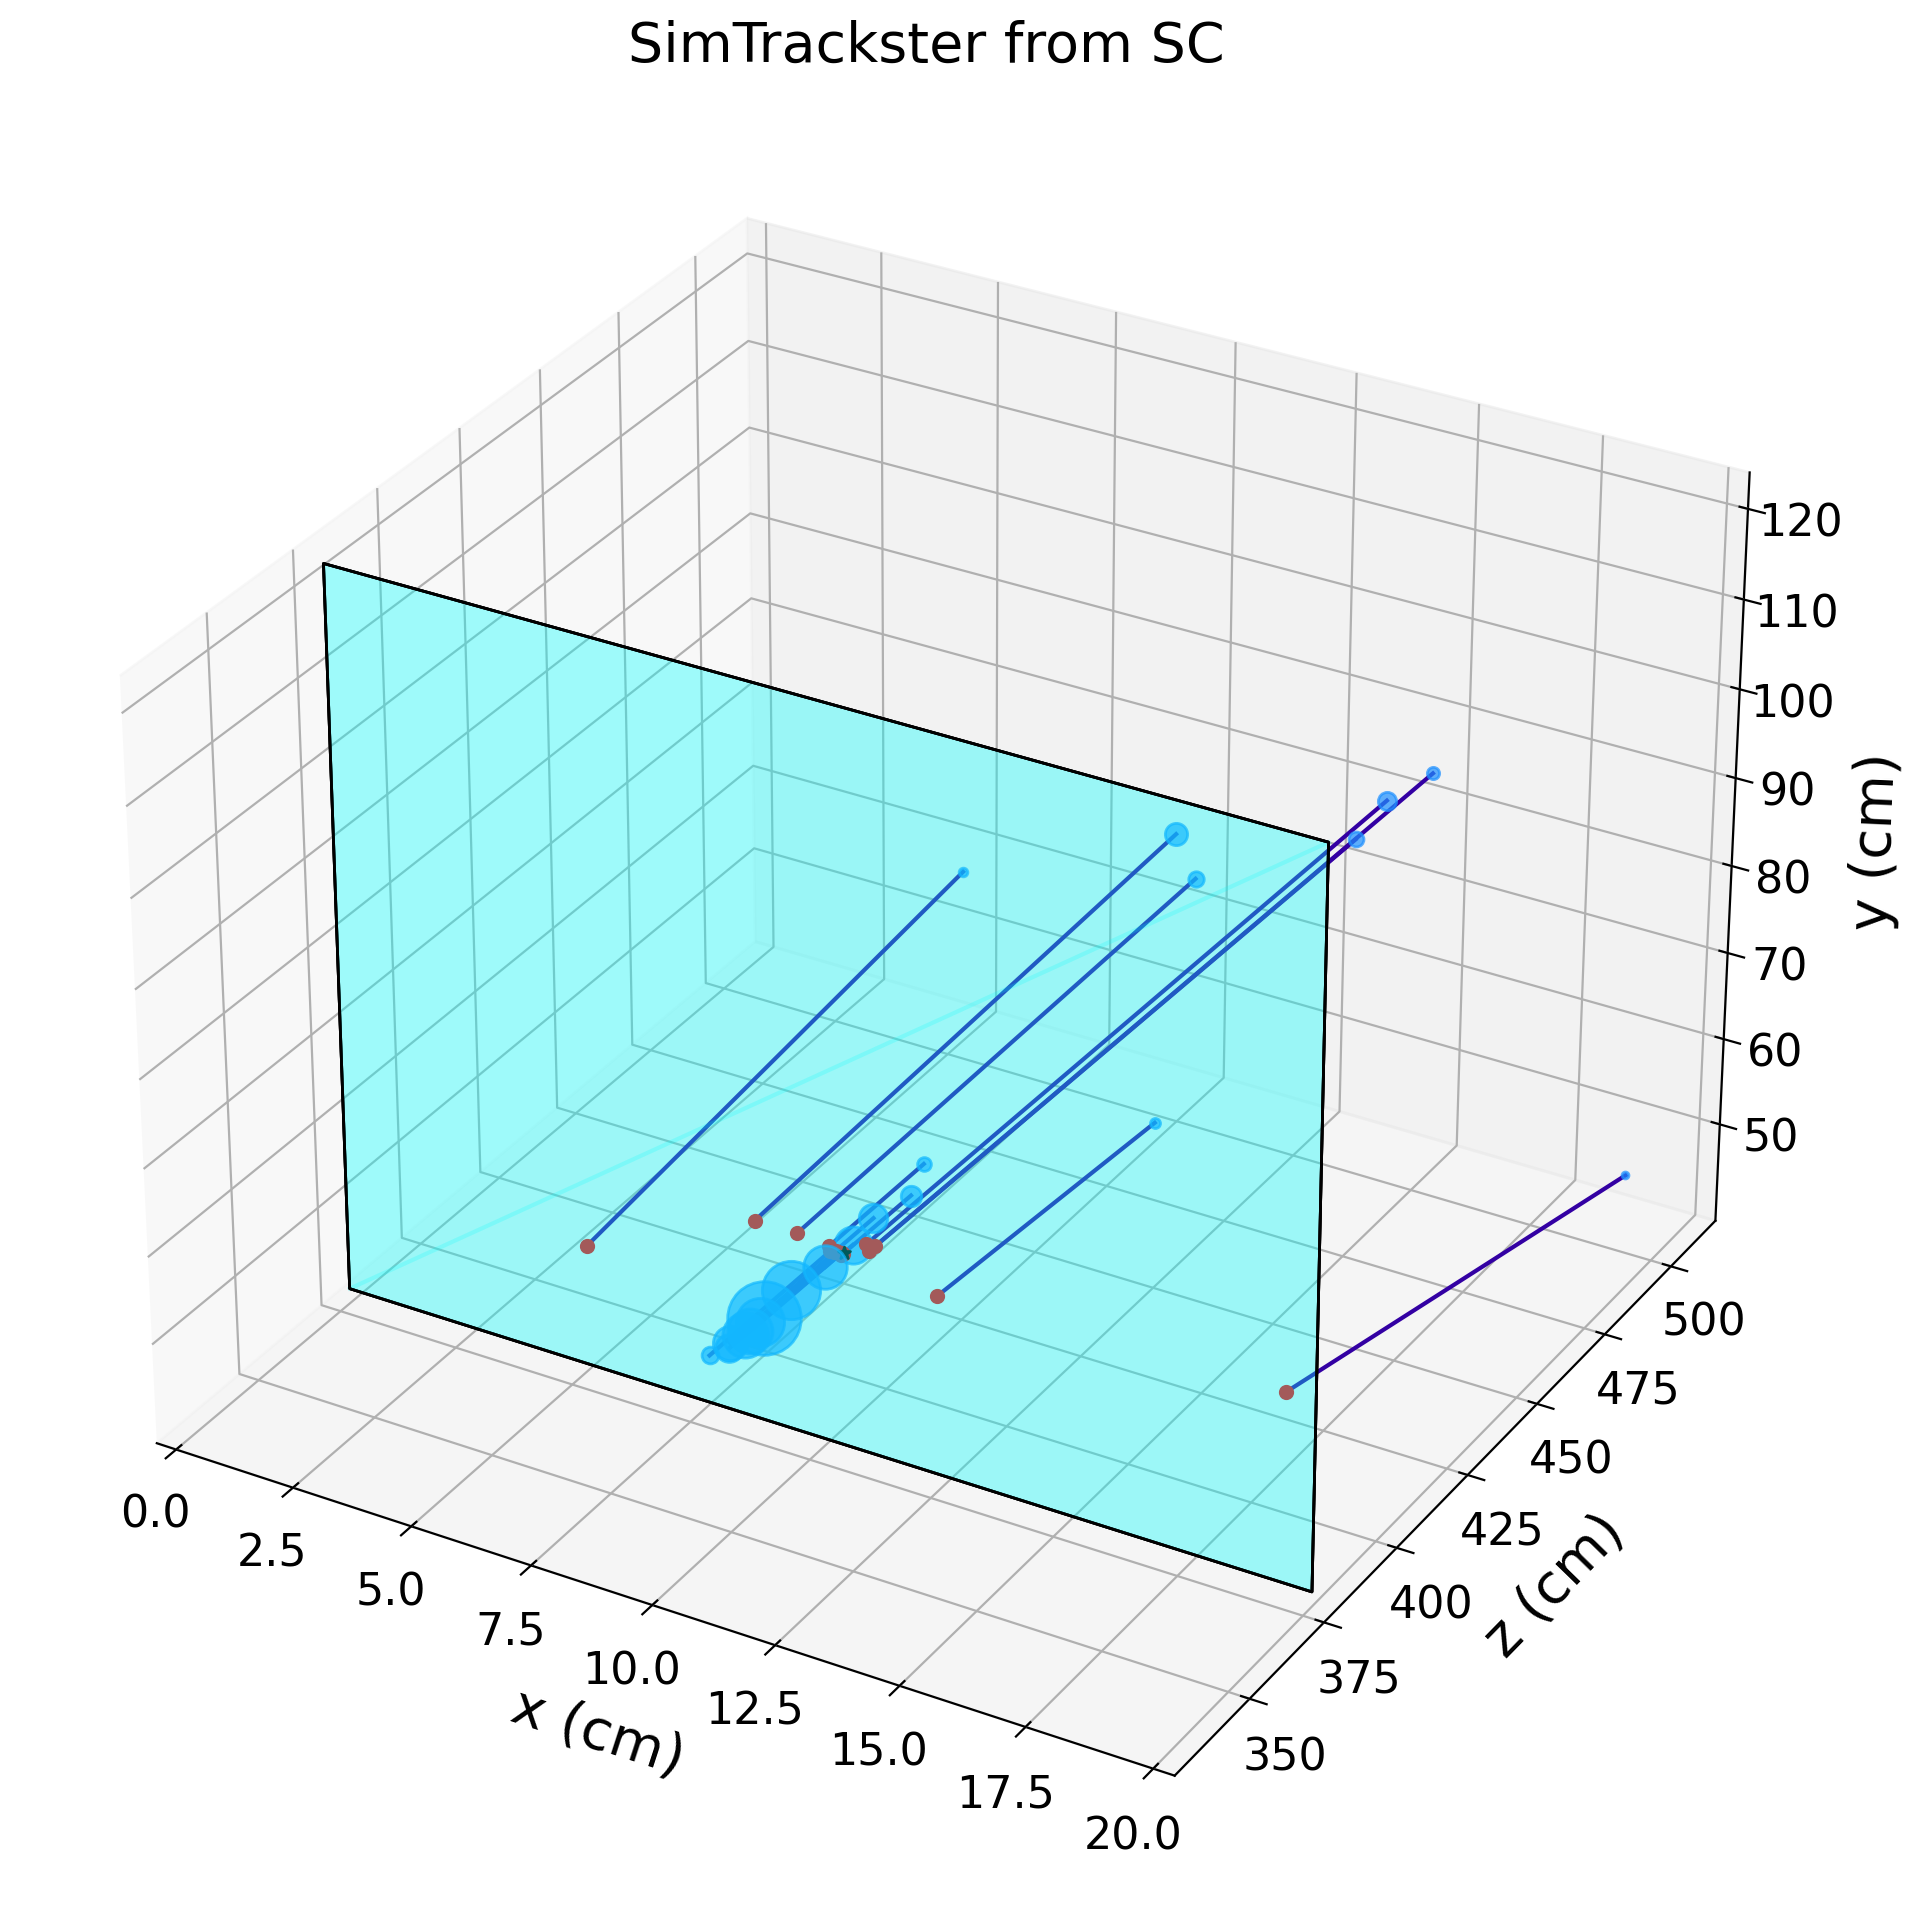

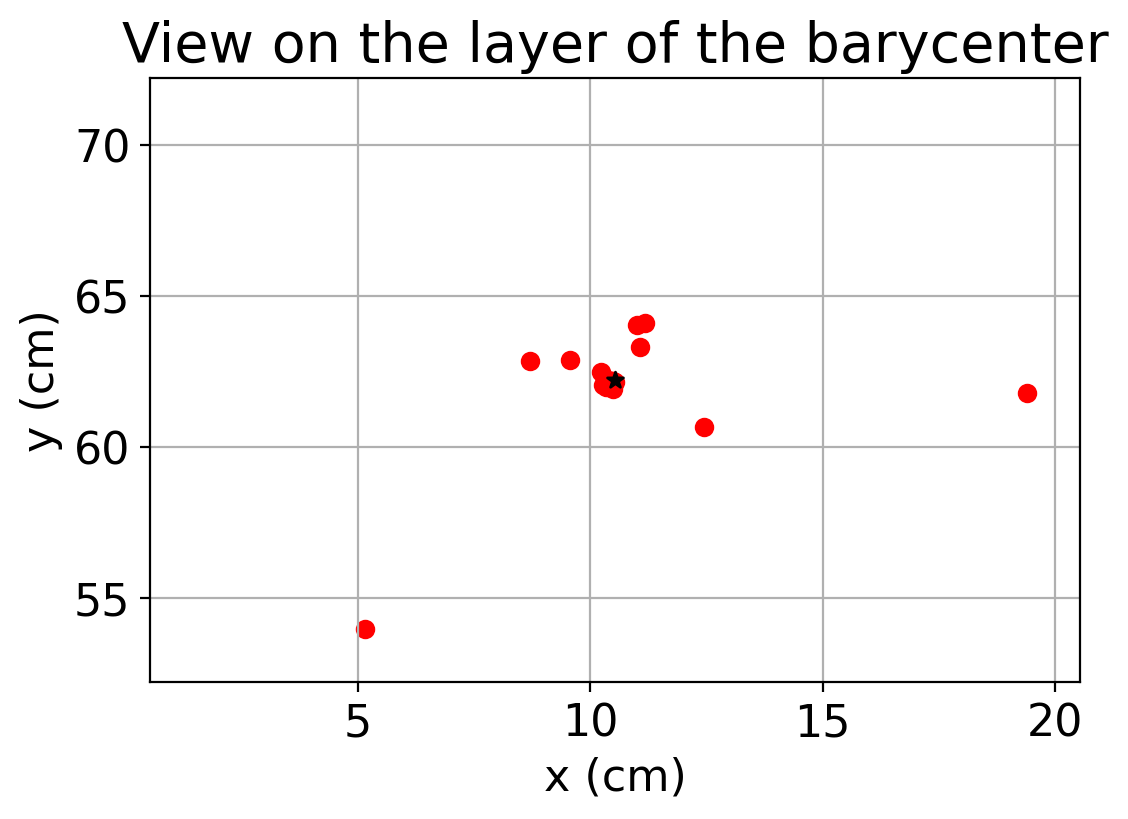

In [61]:
%matplotlib inline
eid = 16
tid = 1
fig = plt.figure(figsize=(12,12))#, dpi=200)
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("\nx (cm)", fontsize=20)
ax1.set_zlabel("\ny (cm)", fontsize=20)
ax1.set_ylabel("\nz (cm)", fontsize=20)

ax1.set_xlim(0,20)#, ak.max(SC_vx[eid][tid])) #ak.min(SC_vx[eid][tid])
ax1.set_zlim(ak.min(SC_vy[eid][tid]), ak.max(SC_vy[eid][tid]))
ax1.set_ylim(ak.min(SC_vz[eid][tid]), ak.max(SC_vz[eid][tid]))

x_points = []
y_points = []

tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(SC_vx[eid], SC_vy[eid], SC_vz[eid], SC_ve[eid], SC_vt[eid], SC_vi[eid], SC_vm[eid])

for i, [x, y, z, e, t] in enumerate(zip(tx2, ty2, tz2, te2, tt2)): #SC_vx[eid][tid], SC_vy[eid][tid], SC_vz[eid][tid], SC_ve[eid][tid], SC_vt[eid][tid])): #tx2, ty2, tz2, te2):
    if (t!=-99):
        ax1.scatter(x, z, y, s=5*e, c="dodgerblue", alpha=0.7)
        point_on_bar = prop_to_bar([x,y,z], SC_bz[eid][tid])
        ax1.scatter(point_on_bar[0], point_on_bar[2], point_on_bar[1], c="red")
        ax1.plot([point_on_bar[0], x], [point_on_bar[2], z], [point_on_bar[1], y], c="#3300a3")
        x_points.append(point_on_bar[0])
        y_points.append(point_on_bar[1])
        
a=(0,ak.min(SC_vy[eid][tid]), SC_bz[eid][tid]) #ak.min(SC_vx[eid][tid])
b=(20,ak.max(SC_vy[eid][tid]), SC_bz[eid][tid]) #ak.max(SC_vx[eid][tid])
plot_cube(a, b, ax1)

ax1.scatter(SC_bx[eid][tid], SC_bz[eid][tid], SC_by[eid][tid], c="black", marker="*", s=20)
ax1.set_title(f"SimTrackster from SC")
plt.savefig("3d_tsTimeProg.png")
plt.show()

plt.figure(dpi=200)
plt.scatter(x_points, y_points, c="red")
plt.scatter(SC_bx[eid][tid], SC_by[eid][tid], c="black", marker="*")
plt.title("View on the layer of the barycenter")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(SC_bx[eid][tid]-10, SC_bx[eid][tid]+10)
plt.ylim(SC_by[eid][tid]-10, SC_by[eid][tid]+10)
plt.grid()
# plt.savefig("2d_tsTimeProg.png")
plt.show()

In [53]:
SC_be[eid][tid]

721.9072875976562

In [20]:
eid = 0

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("x (cm)")
ax1.set_zlabel("y (cm)")
ax1.set_ylabel("z (cm)")

ax1.set_xlim(ak.min(SC_vx[eid]), ak.max(SC_vx[eid]))
ax1.set_zlim(ak.min(SC_vy[eid]), ak.max(SC_vy[eid]))
ax1.set_ylim(ak.min(SC_vz[eid]), ak.max(SC_vz[eid]))

for i, [x, y, z, e] in enumerate(zip(SC_vx[eid], SC_vy[eid], SC_vz[eid], SC_ve[eid])): #tx2, ty2, tz2, te2):
    ax1.scatter(x, z, y, s=8*e, c=color[i])

ax1.set_title(f"SimTrackster from SC")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("x (cm)")
ax1.set_zlabel("y (cm)")
ax1.set_ylabel("z (cm)")

ax1.set_xlim(ak.min(trackstersMerged_vx[eid]), ak.max(trackstersMerged_vx[eid]))
ax1.set_zlim(ak.min(trackstersMerged_vy[eid]), ak.max(trackstersMerged_vy[eid]))
ax1.set_ylim(ak.min(trackstersMerged_vz[eid]), ak.max(trackstersMerged_vz[eid]))

# ax1.set_xlim(ak.min(tracksters_vx[eid]), ak.max(tracksters_vx[eid]))
# ax1.set_zlim(ak.min(tracksters_vy[eid]), ak.max(tracksters_vy[eid]))
# ax1.set_ylim(ak.min(tracksters_vz[eid]), ak.max(tracksters_vz[eid]))

for i, [x, y, z, e] in enumerate(zip(tracksters_vx[eid], tracksters_vy[eid], tracksters_vz[eid], tracksters_ve[eid])): #tx2, ty2, tz2, te2):
    ax1.scatter(x, z, y, s=8*e, c=color[i])

ax1.set_title(f"Reco tracksters ({len(tracksters_vx[eid])} tracksters)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("x (cm)")
ax1.set_zlabel("y (cm)")
ax1.set_ylabel("z (cm)")

ax1.set_xlim(ak.min(trackstersMerged_vx[eid]), ak.max(trackstersMerged_vx[eid]))
ax1.set_zlim(ak.min(trackstersMerged_vy[eid]), ak.max(trackstersMerged_vy[eid]))
ax1.set_ylim(ak.min(trackstersMerged_vz[eid]), ak.max(trackstersMerged_vz[eid]))

for i, [x, y, z, e] in enumerate(zip(trackstersMerged_vx[eid], trackstersMerged_vy[eid], trackstersMerged_vz[eid], trackstersMerged_ve[eid])): #tx2, ty2, tz2, te2):
    ax1.scatter(x, z, y, s=8*e, c=color[i])

ax1.set_title(f"Reco trackstersMerged ({len(trackstersMerged_vx[eid])} tracksters)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
SEGM=10

In [24]:
#%matplotlib widget
#eid=10

C = 29.9792458 #ns/cm

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("z (cm)")
ax1.set_zlabel("y (cm)")

vx = tracksters_vx[eid]
vy = tracksters_vy[eid]
vz = tracksters_vz[eid]
ve = tracksters_ve[eid]
vt = tracksters_vt[eid]
bx = tracksters_bx[eid]
by = tracksters_by[eid]
bz = tracksters_bz[eid]
bt = tracksters_CALO_time[eid]
EVx = tracksters_EVx[eid]
EVy = tracksters_EVy[eid]   
EVz = tracksters_EVz[eid]

i=0
for x, y, z, e, t, xb, yb, zb, tb, evx, evy, evz in zip(vx, vy, vz, ve, vt, bx, by, bz, bt, EVx, EVy, EVz): #tx2, ty2, tz2, te2):
    for xx, yy, zz, ee, tt in zip(x[t>-99], y[t>-99], z[t>-99], e[t>-99], t[t>-99]):
        ax1.scatter(xx, zz, yy, s=8*ee, color=color[i]) #cm.rainbow(i*100)
        ax1.text(xx, zz, yy, '%.3f ns' % (tt) , size=12)
    if tb > -99:
        ax1.scatter(xb, zb, yb, s=20, c='red', marker="*")
        ax1.plot([xb-SEGM*evx, xb+SEGM*evx], [zb-SEGM*evz, zb+SEGM*evz], [yb-SEGM*evy, yb+SEGM*evy], c='red', linestyle='dashed') 
        ax1.text(xb, zb, yb, 'B: %.3f ns' % (tb), size = 12, horizontalalignment='right', verticalalignment='top', color='red')
    i+=1

ax1.set_title(f"tracksters with time")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
#%matplotlib widget
#eid=10

C = 29.9792458 #ns/cm

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("z (cm)")
ax1.set_zlabel("y (cm)")

vx = trackstersMerged_vx[eid]
vy = trackstersMerged_vy[eid]
vz = trackstersMerged_vz[eid]
ve = trackstersMerged_ve[eid]
vt = trackstersMerged_vt[eid]
bx = trackstersMerged_bx[eid]
by = trackstersMerged_by[eid]
bz = trackstersMerged_bz[eid]
bt = trackstersMerged_CALO_time[eid]
EVx = trackstersMerged_EVx[eid]
EVy = trackstersMerged_EVy[eid]   
EVz = trackstersMerged_EVz[eid]   
MTD_time = trackstersMerged_MTD_time[eid]  
MTD_err = trackstersMerged_MTD_err[eid]
MTD_speed = trackstersMerged_MTD_speed[eid]  
MTD_posX = trackstersMerged_MTD_posX[eid]
MTD_posY = trackstersMerged_MTD_posY[eid]
MTD_posZ = trackstersMerged_MTD_posZ[eid]

i=0
for x, y, z, e, t, xb, yb, zb, tb, evx, evy, evz in zip(vx, vy, vz, ve, vt, bx, by, bz, bt, EVx, EVy, EVz): #tx2, ty2, tz2, te2):
    for xx, yy, zz, ee, tt in zip(x[t>-99], y[t>-99], z[t>-99], e[t>-99], t[t>-99]):
        ax1.scatter(xx, zz, yy, s=8*ee, color=color[i]) #cm.rainbow(i*100)
#         ax1.text(xx, zz, yy, '%.3f ns' % (tt) , size=12)
    if tb > -99:
        ax1.scatter(xb, zb, yb, s=20, c='red', marker="*")
        ax1.plot([xb-SEGM*evx, xb+SEGM*evx], [zb-SEGM*evz, zb+SEGM*evz], [yb-SEGM*evy, yb+SEGM*evy], c='black', linestyle='dashed', alpha=0.5) 
        ax1.text(xb, zb, yb, 'B: %.3f ns' % (tb), size = 12, horizontalalignment='right', verticalalignment='top', color='red')
    i+=1

        
# draw ETL
# draw ETL
sign = vz[0][0] / abs(vz[0][0])
a = (min(ak.min(vx), ak.min(MTD_posX[MTD_time>0])), min(ak.min(vy), ak.min(MTD_posY[MTD_time>0])), sign*299)  # p1
b = (max(ak.max(vx), ak.max(MTD_posX[MTD_time>0])), max(ak.max(vy), ak.max(MTD_posY[MTD_time>0])), sign*303)  # p2

plot_cube(a, b, ax1)

for t, x, y, z in zip(MTD_time, MTD_posX, MTD_posY, MTD_posZ):
    if t>0:
        ax1.scatter(x, z, y, s=20, c='midnightblue', marker="s")
        ax1.text(x, z, y, '%.3f ns' % (t), size = 12, horizontalalignment='right', verticalalignment='top', color='midnightblue')
        
ax1.set_title(f"trackstersMerged with time")
plt.show()

In [ ]:
#loop over tkMerged
for tkMerged in range(len(bx)):
    if MTD_time[tkMerged] > 0:
        tk_ids = tracksters_in_candidate[eid][tkMerged]
        print([tracksters_CALO_time[eid][i] for i in tk_ids])
        # print(trackstersMerged_CALO_time[eid][tkMerged])

In [ ]:
#%matplotlib widget
#eid=10

C = 29.9792458 #ns/cm

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("z (cm)")
ax1.set_zlabel("y (cm)")

vx = tracksters_vx[eid]
vy = tracksters_vy[eid]
vz = tracksters_vz[eid]
ve = tracksters_ve[eid]
vt = tracksters_vt[eid]
bx = tracksters_bx[eid]
by = tracksters_by[eid]
bz = tracksters_bz[eid]
bt = tracksters_CALO_time[eid]
EVx = tracksters_EVx[eid]
EVy = tracksters_EVy[eid]   
EVz = tracksters_EVz[eid]

i=0
for tkMerged in range(len(trackstersMerged_bx[eid])):
    if trackstersMerged_MTD_time[eid][tkMerged] > 0:
        tk_ids = tracksters_in_candidate[eid][tkMerged]

        for j, [x, y, z, e, t, xb, yb, zb, tb, evx, evy, evz] in enumerate(zip(vx, vy, vz, ve, vt, bx, by, bz, bt, EVx, EVy, EVz)): #tx2, ty2, tz2, te2):
#             print(j, tk_ids)
            if j in tk_ids:
                for xx, yy, zz, ee, tt in zip(x, y, z, e, t):
                    #print(xx, zz, yy, tt)
                    ax1.scatter(xx, zz, yy, s=8*ee, color=color[i*3]) #cm.rainbow(i*100)
                    #ax1.text(xx, zz, yy, '%.3f ns' % (tt) , size=12)
                if tb > -99:
                    ax1.scatter(xb, zb, yb, s=20, c='red', marker="*")
                    ax1.plot([xb-SEGM*evx, xb+SEGM*evx], [zb-SEGM*evz, zb+SEGM*evz], [yb-SEGM*evy, yb+SEGM*evy], c='red', linestyle='dashed') 
                    ax1.text(xb, zb, yb, 'B: %.3f ns' % (tb), size = 12, horizontalalignment='right', verticalalignment='top', color='red')
        i+=1

ax1.set_title(f"tracksters linked to track")
plt.show()

## track association

In [103]:
def find_track_in_candidate(j, TICLtracks):
    for i, trk in enumerate(TICLtracks):
        try:
            k = np.where(trk==j)[0][0]
            return i
        except: 
            continue
    return -1 #should not get here

In [107]:
# efficiency using reco to sim WRONG: USE SIM TO RECO
# loop on STs' tracks
# take the candidate associated to the track (skip if candidate empty)
# check (using energy associator) the ST associated to the tracksters in the candidate
all_energy = []
empty_but_reco_is_there = []
empty = []
reco_but_not_sim = [] 
wrong_energy = [] 
ok_energy = []

ok=0
den=0
for ev in range(1000): 
#     print("----")
#     print("cand ", tracksters_in_candidate[ev])
#     print("tracks ", track_in_candidate[ev])
#     print("score ", recoToSim_score[ev])
#     print("score idx ", recoToSim_index[ev])
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        try:
#            print(track_id[ev], tkIdx)
            id_in_trkColl = np.where(track_id[ev] == tkIdx)[0][0]
        except:
            # tsos was not valid
            continue
        if track_pt[ev][id_in_trkColl] < 2: # GeV
            continue
        all_energy.append(SC_be[ev][s])  
        den+=1
        cand_track = find_track_in_candidate(tkIdx, track_in_candidate[ev])
        cand = tracksters_in_candidate[ev][cand_track]
        if len(cand) == 0:
            # vedere se c'è un reco associato al sim simtoreco < 0.35
            s2r_score = simToReco_score[ev][s]
            if min(s2r_score) < 0.35:
                empty_but_reco_is_there.append(SC_be[ev][s])
                if SC_be[ev][s] > 80:
                    print(ev, SC_be[ev][s])
            else:
                empty.append(SC_be[ev][s])  
            continue # empty candidate -> only track in candidate

        #for r, tks in enumerate(cand):
        ass = recoToSim_score[ev][cand_track]
        s_min = np.argmin(ass)
        if recoToSim_score[ev][cand_track][s_min]>0.35:
#             print("reco not associated to sim")
            reco_but_not_sim.append(SC_be[ev][s])
            continue
        s_assoc = recoToSim_index[ev][cand_track][s_min]
        if s==s_assoc:
            ok += 1
            ok_energy.append(SC_be[ev][s])
        else:
            wrong_energy.append(SC_be[ev][s])

66 89.12104034423828
92 87.63773345947266
121 83.71299743652344
140 83.13473510742188
153 93.54251098632812
182 83.37602233886719
191 100.49324035644531
221 92.56136322021484
239 90.87937927246094
295 81.09378814697266
309 85.1968002319336
335 82.40776824951172
348 86.89248657226562
380 80.40381622314453
407 102.43736267089844
528 84.1263656616211
582 87.58436584472656
585 101.50438690185547
605 82.59788513183594
633 84.2926025390625
709 88.64783477783203
723 98.85551452636719
925 90.29521942138672
994 86.58216094970703
997 83.22956085205078


In [105]:
eff = ok/den
print(eff)

0.34025974025974026


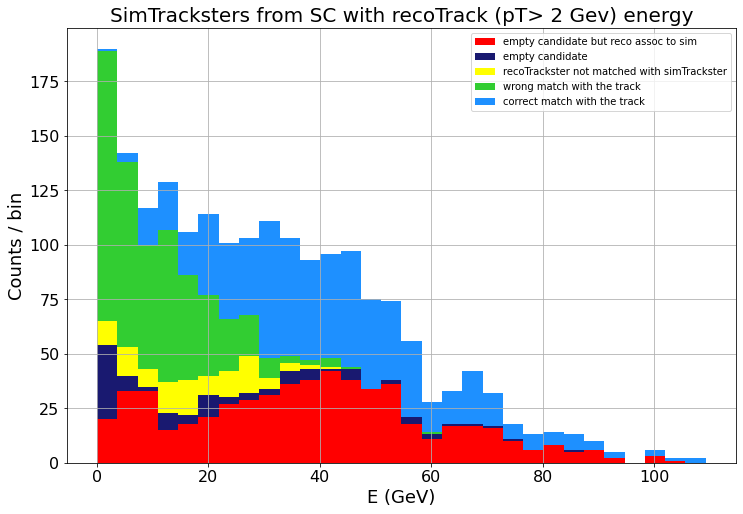

In [106]:
plt.figure(figsize=(12,8))
#plt.hist(all_energy, label="all", color="red", alpha=0.5, bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=False)
# plt.hist( label="not matched", color="orange", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)
# plt.hist(wrong_energy, label="wrong match", color="blue", histtype="step", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)

plt.hist([empty_but_reco_is_there, empty, reco_but_not_sim, wrong_energy, ok_energy],
         label=["empty candidate but reco assoc to sim", "empty candidate", "recoTrackster not matched with simTrackster", "wrong match with the track", "correct match with the track"], 
         color=["red","midnightblue", "yellow", "limegreen","dodgerblue"], 
         bins=30, 
         range=(min(all_energy), max(all_energy)), 
         stacked=True)

plt.grid()
plt.legend()
plt.title('SimTracksters from SC with recoTrack (pT> 2 Gev) energy')
plt.xlabel('E (GeV)', size=18)
plt.ylabel('Counts / bin', size=18)
plt.show()

In [ ]:
for ev in range(100):
    try:
        if ak.all(np.sort(track_in_candidate[track_in_candidate<4294967295][ev])!=np.sort(track_id[ev])) or ak.all(np.sort(SC_trackIdx[ev])!=np.sort(track_id[ev])):
            print(track_in_candidate[track_in_candidate<4294967295][ev])
            print(track_id[ev])
            print(SC_trackIdx[ev])
            print("-------")
    except:
        print(track_in_candidate[track_in_candidate<4294967295][ev])
        print(track_id[ev])
        print(SC_trackIdx[ev])
        print("-------")    

In [36]:
# loop on tracks associated to candidates
# check if candidate is empty
num_with_track=[]
num_no_track=[]
num_empty=[]
den=[]
ok=0
not_ok=0
for ev in range(1000): 
    for s, tkIdx in enumerate(track_in_candidate[ev]):
#         print(track_in_candidate[ev][s], tracksters_in_candidate[ev][s], candidate_energy[ev][s])
        energy = candidate_energy[ev][s]
        den.append(energy)
        if tkIdx == -1:
            num_no_track.append(energy)
            continue 
            
        cand = tracksters_in_candidate[ev][s]
        if len(cand) == 0:
            not_ok += 1
            num_empty.append(energy)
        else:
            ok += 1
            num_with_track.append(energy)

print(ok / (ok + not_ok))

0.7796447431589054


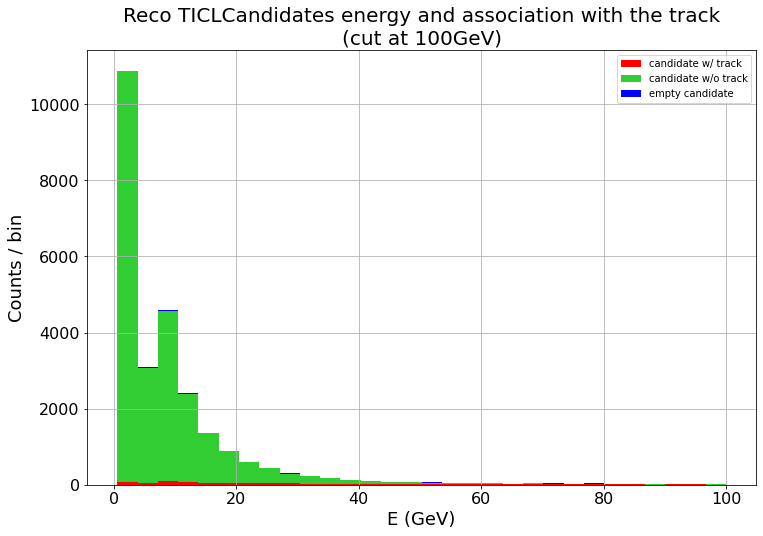

In [51]:
plt.figure(figsize=(12,8))
#plt.hist(all_energy, label="all", color="red", alpha=0.5, bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=False)
# plt.hist( label="not matched", color="orange", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)
# plt.hist(wrong_energy, label="wrong match", color="blue", histtype="step", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)

plt.hist([num_with_track, num_no_track, num_empty],
         label=["candidate w/ track", "candidate w/o track", "empty candidate"], 
         color=["red", "limegreen", "blue"], 
         bins=30, 
         range=(min(den), 100), 
         stacked=True)

plt.grid()
plt.legend()
plt.title('Reco TICLCandidates energy and association with the track\n(cut at 100GeV)')
plt.xlabel('E (GeV)', size=18)
plt.ylabel('Counts / bin', size=18)
# plt.yscale("log")
plt.show()

In [19]:
# check that the only LC with one hit are in the scintillator
# OK if it does not print anything

ok = 0
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        indices = SC_vi[ev][s]
        if len(indices)>0:
            mask = np.where(cluster_number_of_hits[ev][indices]==1)[0]
            positions = ([pos for pos in cluster_type[ev][indices][mask] if pos!=8])
            if len(positions)>0:
                print(positions)
#             print(cluster_number_of_hits[ev][indices][mask])
#             print(cluster_layer_id[ev][indices][mask])
#             print("---")

[5, 7, 2, 5, 5, 2, 5, 5, 5, 5, 2, 5, 2, 2, 5, 2, 5, 2, 2, 5, 5, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 5, 5, 7, 2, 5, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[5, 5, 5, 5, 5, 5, 2, 5, 5, 2, 5, 5, 7, 2, 5, 5, 2, 5, 5, 5, 7, 5, 5, 2, 2, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0

[0, 2, 2, 2, 0, 2, 2]
[2, 2, 1, 1, 2, 1, 1, 1, 1, 2]
[1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
[2, 2, 1, 2, 7, 1, 1, 5, 7, 2, 2, 2, 2, 5, 7, 2, 2, 2, 1, 5, 2, 5, 2, 1, 1, 1, 2, 2, 5, 2, 5, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2]
[4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 5, 2, 2, 5, 2, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[4, 1, 1, 0, 1, 0, 1]
[2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[7, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 7, 5, 7, 2, 5, 2, 5, 5, 2, 5, 5, 2, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 7, 5, 2, 5, 7, 5, 5, 5, 7, 2, 7, 7, 5, 5, 5, 5, 5, 5, 7, 2, 7, 5, 5, 7, 5, 7, 5, 7, 5, 2, 5, 5, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

[0, 0]
[0]
[0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0]
[0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0]
[2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2]
[1, 1, 1, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[3, 3, 0, 7, 0, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

[0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0]
[3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 4, 3, 6, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 3, 7, 3, 6, 6, 6, 7, 3, 6, 6, 6, 3, 3, 7, 3, 6, 6, 3, 3, 6, 3, 3, 6, 3, 3, 6, 5, 7, 6, 6, 6, 6, 6, 7, 7, 7, 6, 7, 7, 7, 3, 7]
[3, 3, 3, 3, 3, 3, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 6, 3, 3, 3, 0, 3, 0, 3, 6, 3, 3, 6, 3, 0, 3, 3, 3, 0, 3, 0, 6, 3, 1, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1]
[1, 1]
[0, 0, 0, 0, 0]
[0, 0, 0]
[0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 

[3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[6, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 0, 0, 3, 0, 3, 0, 6, 3, 3, 3, 3, 0, 3, 6, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[6, 3, 0, 7, 0, 3, 7, 6, 3, 3, 3, 3, 3, 0, 3, 6, 6, 6, 3, 0, 3, 1, 3, 3, 7, 0, 0, 7, 3, 3, 6, 6, 3, 3, 6, 3, 7, 0, 7, 6, 3, 0, 3, 6, 3, 3, 7, 3, 3, 1, 7, 3, 7, 3, 0, 3, 7, 7, 7, 3, 3, 7, 3, 7, 0, 3, 0, 3, 6, 0, 3, 7, 3, 6, 6, 0, 3, 0, 0, 0, 0, 6, 3, 3, 3, 6, 3, 3, 3, 0, 0, 6, 3, 0, 0, 3, 5, 3, 6, 6, 6, 3, 3, 0, 3, 3, 7, 0, 6, 7, 3, 0, 3, 0, 3, 6, 3, 0, 6, 0, 0, 3, 3, 3, 0, 0, 3, 0, 7, 6, 7, 0, 0, 3, 3, 6, 2, 6, 0, 6, 0, 0, 0, 0, 7, 0, 0, 6, 6, 0, 0, 7, 6, 6, 6, 0, 6, 0, 0, 0, 6, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 0, 0, 0, 7, 0, 0, 0, 7, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[2, 5, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0]
[5, 1, 1, 1, 7, 5, 2, 1, 5, 5, 1, 1, 7, 7, 1, 5, 7, 1, 5, 5, 1, 1, 7, 1, 2, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2]
[2]
[7, 1, 6, 7, 7, 5, 7, 7, 7, 7, 5, 7, 7, 4, 5, 1, 2, 5, 3, 2, 5, 5, 1, 1, 7, 3, 5, 0, 7, 5, 1, 7, 7, 7, 5, 5, 5, 7, 7, 7, 0, 5, 7, 2, 2, 7, 7, 4, 7, 7, 7, 7, 1, 5, 5, 7, 7, 7, 7, 7, 5, 4, 7, 5, 3, 7, 7, 5, 5, 3, 5, 1, 5, 3, 2, 5, 5, 7, 0, 7, 4, 7, 5, 5, 7, 0, 1, 7, 2, 2, 4, 4, 5, 0, 2, 5, 3, 7, 7, 5, 2, 5, 0, 2, 7, 1, 1, 7, 5, 1, 7, 5, 5, 5, 0, 4, 5, 5, 4, 1, 7, 1, 1, 4, 5, 1, 1, 7, 7, 5, 5, 1, 7, 7, 1, 7, 5, 0, 7, 7, 4, 5, 5, 2, 5, 2, 1, 5, 2, 1, 1, 1, 7, 7, 1, 1, 7, 0, 1, 5, 1, 7, 1, 2, 5, 7, 1, 1, 2, 4, 1, 2, 1, 4, 4, 1, 0, 5, 5, 2, 7, 5, 1, 5, 4, 4, 5, 5, 1, 0, 7, 5, 4, 7, 5, 7, 7, 7, 1, 5, 5, 1, 2, 7, 5, 1, 4, 4, 0, 4, 5, 2, 1, 5, 5, 0, 0, 7, 7, 1, 7, 1, 7, 1, 2, 7, 1, 7, 5, 0, 1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
[1, 0, 1, 1, 0]
[0]
[0, 0]
[0, 0, 0]
[0]
[0, 0, 0]
[0, 0]
[0, 2, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0]
[0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 3, 3, 5, 0, 3, 0, 3, 3, 5, 3, 3, 4, 3, 5, 6, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 4, 3, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0]
[1, 2, 1, 2, 1, 2, 1]
[1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1]
[0, 0]
[5, 7, 0, 0, 0]
[3, 3, 6, 3, 3, 3, 6, 6, 3]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 7, 3, 3, 3, 3, 3, 6, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 6, 3, 3, 3, 0, 3, 3, 3, 6, 0, 3, 0, 3, 0, 3, 3, 3, 3,

[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 4, 3, 3, 0, 6, 5, 3, 4, 3, 1, 3, 0, 0, 0, 6, 3, 5, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2]
[1, 1, 1, 1, 1, 1]
[0]
[3, 6, 6, 0, 3, 0, 3, 0, 6, 3, 3, 3, 0, 3, 0, 3, 6, 6, 5, 6, 3, 0, 3, 7, 7, 6, 6, 3, 3, 3, 3, 3, 7, 3, 5, 3, 0, 6, 0, 3, 6, 7, 6, 3, 0, 3, 3, 6, 3, 0, 3, 7, 7, 0, 3, 3, 3, 6, 3, 3, 7, 6, 3, 6, 3, 0, 3, 6, 6, 3, 7, 7, 3, 7, 0, 3, 6, 7, 3, 3, 3, 0, 6, 6, 7, 0, 3, 7, 6, 3, 7, 3, 3, 6, 5, 3, 3, 6, 7, 6, 3, 3, 3, 3, 0, 3, 0, 3, 6, 6, 3, 3, 3, 6, 0, 6, 0, 3, 6, 3, 3, 3, 6, 0, 3, 4, 6, 0, 0, 7, 0, 0, 6, 6, 5, 3, 3, 7, 0, 0, 3, 0, 0, 7, 3, 0, 0, 3, 7, 3, 0, 7, 7, 0, 0, 0, 0, 0, 0, 6, 6, 6, 3, 3, 0, 3, 0, 6, 0, 6, 0, 3, 0, 0, 3, 3, 3, 0, 0, 7, 3, 3, 3, 6, 6, 7, 0, 6, 0, 3, 3, 0, 0, 6, 0, 6, 0, 0, 3, 0, 0, 7, 3, 7, 6,

[0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0]
[0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0]
[3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1]
[0]
[3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0]
[0]
[0, 0]
[1]
[2, 2, 2, 2, 2]
[2, 2, 2, 2, 2]
[2]
[2, 2]
[2]
[2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 2]
[0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0]
[5, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2]
[1, 2, 2]
[0, 0]
[0, 0]
[2, 2, 2, 2, 2]
[3, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0

[5, 5, 5, 7, 2, 2, 2, 7, 7, 5, 2, 7, 7, 2, 1, 7, 1, 5, 7, 7, 2, 7, 5, 5, 5, 5, 7, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
[2, 2, 5, 5, 5, 5, 1, 5, 7, 5, 5, 5, 5, 5, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1]
[3, 1, 5, 5, 5, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 2, 2, 1, 5, 5, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2]
[2, 2, 2, 7, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 7, 2, 2, 5, 2, 2, 2, 2, 5, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[5, 2, 5, 2, 7, 5, 2, 2, 5, 2, 2, 2, 2, 5, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2

[0, 0, 0, 0]
[3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 2, 5, 0, 0, 5, 0, 4, 4, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1]
[6, 0, 0, 0, 1, 0, 3, 3, 0, 0, 0, 3, 3, 3, 1, 0, 3, 3, 0, 4, 0, 4, 3, 0, 3, 0, 3, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[4, 3, 3, 6, 3, 5, 3, 3, 3, 3, 3, 0, 3, 6, 6, 0, 0, 0, 0, 0]
[0, 7, 0, 3, 0, 7, 0, 7, 3, 0, 7, 0, 7, 0, 0, 7, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 3, 3, 3, 4, 7, 7, 4, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 3, 0, 0, 0, 3, 3, 6, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[3, 7, 7, 6, 3, 7, 7, 7, 3, 3, 7, 3, 6, 6, 3, 7, 7, 7, 7, 7, 3, 6, 7, 6, 3, 3, 3, 3, 7, 6, 7, 4, 7, 3, 3, 7, 7, 7, 3, 7, 7, 3, 6, 3, 3, 3, 7,

[1, 1, 5, 0, 1, 1, 4, 4, 0, 4, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 5, 0, 1, 1, 0, 0, 1, 4, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2]
[1, 1, 1, 1, 4, 1, 1, 5, 0, 4, 4, 0, 0, 1, 5, 4, 5, 5, 4, 7, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0]
[0]
[0, 0]
[0]
[6, 6, 0, 0, 6, 3, 3, 0, 5, 3, 7, 3, 0, 6, 6, 0, 7, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 1, 0, 1]
[2, 2, 2, 2, 2, 2]
[0, 0]
[0]
[0, 0, 0]
[0]
[0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 2, 0, 2]
[2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0]
[1, 2]
[2]
[0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[1]
[1]
[0]
[0, 0, 0, 0, 0]
[0]
[0, 0]
[0]
[0]
[0, 0, 0, 0, 0]
[0, 0, 0,

[0]
[0, 0, 0, 0]
[1]
[3, 3, 3, 3, 6, 0, 0, 7, 0, 4, 3, 3, 1, 7, 0, 7, 7, 7, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2]
[3, 3, 3, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 4, 2, 6, 0, 0, 0, 6, 3, 3, 3, 0, 7, 3, 1, 3, 3, 0, 7, 3, 7, 4, 7, 7, 6, 3, 3, 0, 7, 7, 0, 3, 3, 7, 7, 6, 1, 0, 3, 0, 3, 0, 4, 0, 6, 0, 3, 3, 0, 0, 0, 4, 0, 0, 1, 0, 6, 0, 0, 0, 1, 0, 7, 2, 0, 1, 6, 1, 0, 7, 0, 0, 7, 7, 5, 7, 0, 5, 0, 7, 5, 7, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2]
[6, 6, 3, 3, 7, 3, 3, 3, 3, 7, 3, 7, 3, 3, 7, 3, 7, 3, 7, 7, 3, 7, 3, 3, 7, 3, 3, 5, 7, 0, 7, 7, 7, 5, 0, 7, 0, 5, 6, 0]
[3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0]
[5, 2, 3, 3, 5, 4, 0, 4, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
[0, 0, 0, 0]
[5, 7, 5, 7, 5, 5, 5, 5, 5, 5, 4, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1

[0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[3]
[1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[1]
[1]
[1, 1, 2, 1, 1, 1]
[2, 2, 2, 2]
[0, 0, 0, 0, 0, 0]
[0, 0, 1]
[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 1, 0]
[0, 0, 2, 0, 0, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[2, 2]
[0, 0, 0, 1, 0, 0]
[3]
[1, 1, 1, 1, 1, 1, 1]
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 7, 5, 3, 7, 3, 0, 4, 7, 0, 6, 4, 3, 0, 3, 0, 3, 5, 4, 4, 0, 5, 5, 5, 0, 3, 0, 3, 3, 3, 3, 3, 3, 5, 7, 7, 7, 3, 5, 0, 6, 7, 0, 4, 0, 4, 0, 5, 7, 5, 0, 5, 5, 0, 5, 7, 7, 0, 5, 0, 0, 0, 7, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0

[0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0]
[1, 1, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 4, 3, 0, 6, 3, 6, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2]
[1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 6, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 7, 0, 7, 7, 3, 3, 3, 7, 3, 7, 7, 0, 7, 0, 0, 3, 7, 6, 7, 5, 3, 7, 6, 3, 6, 7, 7, 0, 7, 0, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[3, 0, 3, 3, 4, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2]
[1, 0, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 5, 2, 1, 2, 2, 1, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 1, 5, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 7, 5, 5, 5, 2, 7, 7, 5, 5, 1, 2, 2, 7, 5, 5, 5, 2, 5, 1, 7, 7, 5, 7, 5, 2, 2, 1, 5, 2, 2, 5, 2, 5, 5, 1, 5, 5, 7, 7, 2, 2, 5, 7, 2, 2, 1, 7, 7, 2, 5, 5, 2, 5, 5, 7, 5, 5, 5, 7, 2, 5, 2, 5, 2, 5, 5, 5, 5, 2, 7, 5, 2, 7, 7, 5, 7, 2, 7, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

[7, 7, 7, 3, 7, 6, 3, 3, 5, 7]
[3, 2, 3, 3, 3, 3, 0, 0, 0, 0, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[7, 7, 3, 7, 6, 6, 6, 7, 7, 7, 7, 3, 6, 7, 7, 6, 7, 7, 7, 3, 7, 7, 7, 3, 7, 7, 7, 3, 3, 7, 3, 7, 3, 3, 7, 3, 7, 6, 6, 3, 3, 6, 3, 7, 3, 3, 3, 3, 3, 3, 0, 3, 7, 7, 6, 4, 7, 7, 6, 7, 3, 7, 7, 5, 3, 3, 0, 7, 7, 3, 3, 6, 7, 3, 7, 6, 3, 6, 3, 7, 1, 6, 7, 4, 3, 7, 7, 3, 3, 3, 6, 7, 7, 3, 3, 7, 7, 7, 3, 3, 6, 7, 3, 3, 7, 7, 7, 3, 3, 7, 3, 3, 3, 7, 3, 3, 7, 7, 7, 3, 3, 7, 7, 3, 3, 7, 3, 6, 7, 6, 3, 3, 3, 7, 6, 7, 3, 5, 6, 6, 6, 3, 7, 1, 0, 7, 7, 3, 3, 3, 3, 3, 7, 7, 7, 3, 6, 7, 3, 3, 7, 7, 5, 7, 7, 6, 7, 7, 7, 3, 6, 3, 3, 3, 3, 7, 7, 7, 6, 7, 7, 6, 7, 7, 7, 7, 7, 0, 6, 7, 7, 7, 6, 6, 7, 0, 7, 7, 7, 7, 7, 6, 6, 7, 7, 6, 0, 7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 0, 7, 7, 7, 0, 5, 7, 5, 7, 7, 0, 5, 0, 7, 7, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2]
[3, 7, 3, 7, 6, 0, 6, 3, 6, 0, 7, 3, 0, 6, 3, 7, 1, 7, 7, 3, 7, 6, 6, 7, 

[0, 0, 2, 2, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0]
[1]
[2]
[0, 0, 0, 0, 0, 0, 1]
[7, 3, 0, 3, 3, 6, 3, 6, 0, 0, 3, 0, 0, 6, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 1, 1]
[3]
[0, 6, 7, 0, 0, 0, 0, 0, 0]
[6]
[4, 3, 1, 4, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 4, 3, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[3, 7, 7, 7, 7, 3, 7, 0, 3, 6, 7, 6, 3, 7, 7, 6, 6, 7, 7, 6, 7, 3, 6, 7, 0, 6, 7, 7, 3, 6, 3, 7, 3, 7, 3, 7, 7, 7, 3, 6, 6, 3, 3, 6, 3, 6, 3, 0, 3, 7, 3, 3, 7, 3, 3, 3, 6, 3, 3, 3, 6, 3, 7, 3, 6, 3, 3, 7, 0, 6, 7, 7, 3, 3, 0, 7, 0, 3, 3, 3, 0, 6, 3, 3, 3, 7, 3, 7, 3, 3, 3, 6, 7, 7, 0, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 5, 0, 7, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0]
[5, 5, 5, 5, 5, 7, 5, 7, 5, 5, 4, 4, 5, 7, 7, 7, 5, 7, 5, 5, 4, 5, 7, 7, 7, 5, 5, 1, 7, 5, 4, 5, 1, 1, 1, 5, 5, 5, 5, 1, 5, 5, 5, 7, 1, 7, 5, 7, 1, 7, 1, 1, 5, 1, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1,

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0]
[0, 0, 0]
[3, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[7, 0]
[3, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0]
[2, 1]
[3, 7, 7, 3, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0]
[0]
[0]
[0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[3, 3, 6, 3, 3, 6, 7, 0]
[7, 7, 6, 6, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 7, 7, 7, 0, 6, 6, 6, 7, 7, 7, 7, 7, 6, 7, 7, 0, 6, 7, 0, 7, 7, 0, 7, 7, 7, 7, 0, 0, 0, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2]
[5, 3, 3, 3, 3, 3, 7, 3, 7, 7, 3, 3, 6, 3, 6, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 6, 7, 0, 1, 2, 1,

[0]
[0, 0, 0]
[5, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0]
[2]
[2, 2, 2, 2, 2, 2, 2, 2]
[0]
[0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 1, 0, 1, 1]
[1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0]
[2]
[5, 5, 2, 1]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 2, 2]
[2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[2]
[2, 2, 2]
[0]
[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0]
[0]
[0, 0]
[6, 3, 6, 0, 0, 0, 0, 0]
[7, 5, 5, 1, 0, 1, 5, 0, 1, 1, 1]
[7, 0, 5, 0, 7, 3, 7, 3, 3, 7, 5, 2, 1, 4, 3, 1, 5, 3, 3, 0, 5, 7, 1, 7, 0, 5, 0, 7, 0, 4, 7, 3, 7, 1, 0, 5, 0, 0, 5, 5, 0, 0, 7, 4, 0, 0, 7, 7, 0, 0, 4, 0, 1, 5, 0, 0, 4, 5, 0, 5, 7, 0, 5, 5, 0, 7, 7, 0, 5, 0, 0, 5, 5, 5, 5, 0, 0, 7, 0, 0, 5, 0, 0, 0, 5, 2, 0, 5, 0, 5, 1, 0, 0, 5, 0, 7, 0, 0, 7, 0, 0, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0,

[0, 0, 0, 1, 2]
[0]
[0]
[0, 0]
[0, 0]
[0, 0]
[1, 0, 0, 1, 0, 0, 1, 0]
[0]
[0]
[1, 0]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0]
[0, 0]
[0]
[0]
[0, 0, 0, 0]
[0, 0, 0]
[0, 1, 1]
[0, 0, 1]
[0, 0]
[1]
[0]
[0, 0, 0, 0, 0, 0]
[1, 2, 1, 2, 1, 1, 1]
[0]
[0, 0]
[0, 0, 1]
[4, 7, 7, 7, 7, 3, 5, 7, 5, 7, 5, 3, 0, 7, 0, 0, 7, 0, 0, 5, 5, 1, 7, 5, 7, 7, 7, 7, 2, 7, 5, 3, 5, 3, 7, 0, 4, 6, 5, 7, 6, 6, 5, 7, 7, 7, 5, 7, 7, 0, 5, 4, 3, 3, 7, 0, 7, 7, 7, 7, 4, 7, 0, 0, 5, 5, 0, 4, 3, 5, 5, 0, 0, 1, 7, 0, 0, 0, 7, 0, 5, 5, 1, 0, 7, 7, 5, 4, 7, 0, 0, 5, 4, 1, 5, 1, 5, 7, 7, 7, 5, 5, 7, 7, 5, 7, 7, 5, 0, 7, 0, 1, 1, 7, 7, 7, 7, 7, 7, 5, 5, 7, 7, 0, 5, 7, 7, 5, 5, 0, 5, 5, 7, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 5, 1, 4, 1, 5, 0, 5, 5, 1, 0, 5, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2]
[0, 7, 0, 5, 0, 4, 1, 5, 5, 4, 5, 5, 1, 7, 5, 7, 0, 5, 2, 5, 5, 5, 0, 7, 0, 0, 5, 7, 0, 5, 7, 0, 2, 2, 1, 7, 0, 1, 5, 0, 0, 0, 5, 7, 0, 0, 2, 1, 1,

[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 5, 5, 2, 5, 5, 5, 5, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2]
[7, 7, 3, 7, 7, 7, 7, 7, 7, 3, 7, 3, 7, 7, 7, 7, 6, 3, 7, 5, 3, 7, 3, 7, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 3, 0, 7, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[3, 6, 0, 3, 6, 3, 3, 7, 3, 6, 6, 7, 5, 3, 3, 3, 7, 3, 7, 3, 7, 3, 0, 5, 5, 6, 0, 5, 0, 1, 0, 0]
[0, 3, 3, 3, 3, 6, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 5, 0, 0, 0, 0, 6, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 7, 3, 6, 6, 3, 6, 7, 6, 3, 7, 6, 3, 7, 3, 6, 6, 6, 7, 7, 3, 6, 7, 3, 3, 6, 7, 3, 3, 7, 3, 7, 6, 7, 7, 6, 7, 3, 3, 6, 6, 3, 7, 6, 6, 7, 6, 6, 7, 6, 3, 6, 7, 3

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 1, 2, 2, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 5, 5, 2, 2, 5, 5, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 2, 2, 2, 2, 2, 5, 2, 5, 5, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[5, 7, 3, 7, 7, 0, 0, 0, 0, 0]
[5, 5, 2, 2]
[5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[7, 2, 2, 5, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5

[0, 0, 0, 0, 0, 0]
[3, 7, 3, 0, 3, 7, 7, 7, 3, 7, 7, 0, 0, 7, 0, 6, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1]
[0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0]
[3, 0]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 0, 7]
[0]
[0]
[0, 0, 0, 0, 0, 0]
[0]
[0]
[0, 0, 0]
[3, 4, 0, 4, 0, 0, 5, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1]
[2, 2]
[5, 5, 5, 5, 5, 2, 5, 5, 5, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 3, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[6, 0, 0]
[5, 3, 7, 7, 3, 7, 7, 3, 3, 3, 5, 1, 7, 7, 6, 3, 7, 7, 3, 7, 3, 7, 7, 7, 7, 3, 3, 7, 7, 7, 7, 7, 7, 7, 3, 7, 6, 3, 7, 7, 7, 5, 7, 7, 6, 7, 3, 7, 7, 5, 7, 7, 7, 7, 7, 7, 3, 7, 

[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0]
[3, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 1, 1, 0]
[0, 0, 0, 0]
[3, 0, 2, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 4, 1, 0, 0, 4, 0, 5, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[3, 0, 0, 0]
[0, 0, 0, 7, 3, 0, 3, 0, 4, 7, 0, 0, 0, 0, 0, 3, 0, 0, 5, 0, 0, 0, 0, 7, 0, 0, 0, 7, 0, 0, 

[5, 7, 5, 5, 5, 5, 7, 1, 1, 5, 5, 5, 5, 1, 1, 1, 1, 1, 2]
[7, 4, 7, 7, 4, 7, 7, 4, 7, 7, 5, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 5, 4, 7, 4, 4, 3, 3, 7, 7, 7, 6, 7, 7, 5, 7, 7, 7, 6, 5, 5, 7, 3, 7, 5, 5, 7, 5, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 5, 7, 4, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 7, 5, 4, 7, 5, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 5, 7, 5, 5, 7, 7, 3, 7, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 5, 7, 1, 7, 7, 7, 7, 7, 7, 5, 7, 7, 5, 7, 7, 7, 7, 7, 5, 5, 7, 7, 1, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 5, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 5, 5, 5, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 5, 5, 7, 5, 5, 5, 7, 7, 5, 1, 5, 7, 1, 5, 7, 5, 0, 1, 1, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2]
[2, 2, 2]
[5, 5, 7, 2]
[3, 0, 0, 0]
[3]
[7]
[1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1]
[2, 1, 2, 1, 2]
[1]
[1, 2]
[1, 1, 1]
[1, 1, 1]
[0]

[5, 4, 0, 5, 1, 4, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 2]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 0]
[1, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2]
[5, 3, 4, 6, 6, 3, 5, 6, 7, 7, 7, 7, 3, 3, 7, 7, 3, 4, 7, 5, 7, 7, 3, 7, 7, 7, 7, 6, 7, 7, 4, 3, 7, 7, 7, 7, 5, 4, 5, 7, 7, 5, 5, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 5, 7]
[5, 3, 2, 4, 5, 3, 3, 3, 7, 4, 7, 0]
[3, 7, 4, 3, 0, 0, 0, 0, 0]
[0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

[0, 1, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 2, 0, 0]
[7, 3, 7, 6, 6, 0, 0, 0, 0]
[2, 0, 0, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0]
[0, 1, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1]
[1, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0]
[0, 1, 0, 0, 1, 0, 1]
[0]
[1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
[0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1]
[2]
[2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0]
[2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2]
[1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

[0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[6, 7, 3, 3, 7, 3, 7, 6, 3, 6, 3, 6, 6, 7, 3, 3, 7, 7, 3, 6, 3, 7, 6, 7, 6, 6, 7, 7, 7, 7, 3, 3, 3, 7, 3, 7, 3, 7, 6, 6, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 5, 5, 7]
[3, 4, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 6, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 3, 0, 7, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[0, 4, 3, 3, 0, 0, 0]
[3, 2, 0]
[4, 0, 0, 0]
[3, 4, 3, 3, 3, 0, 3, 0, 4, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[5, 5, 5, 2, 5, 5, 5, 7, 5, 5, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2]
[0, 3, 0, 0, 0, 0, 0, 0]
[6, 0, 3, 5, 0, 3, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
[3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 6, 0, 0, 7, 3, 7, 4, 7, 7, 3, 7, 3, 0, 3, 0, 0, 4, 0, 3, 3, 3, 0, 3, 3, 3, 0, 7, 7, 3, 0, 7, 4, 7, 7, 3, 3, 3, 2, 3, 0, 5, 3, 4, 3, 0, 7, 3, 7, 0, 0, 0, 3, 7, 3, 6, 7, 3, 7, 0, 3, 7, 7, 7, 0, 3, 0, 0, 7, 7, 5, 3, 3, 7, 7, 5, 7, 7, 0, 7, 7, 0, 7, 6, 4, 7, 3, 3, 7, 3, 3, 3, 7, 5, 0, 7, 0, 7, 7, 0, 2, 7, 0, 0, 0, 0, 5, 0, 7, 1, 7, 0, 0, 5, 0, 0, 1, 0, 4, 7, 7, 0, 7, 3, 0, 0, 0, 1, 0, 0, 7, 2, 5, 7, 5, 0, 0, 0, 0, 7, 0, 1, 7, 7, 1, 0, 0, 1, 0, 5, 5, 0, 3, 7, 1, 0, 0, 5, 3, 1, 5, 5, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 6]
[1, 6, 3, 4, 5, 6, 3,

[2]
[2, 2, 2, 2, 2, 2]
[2, 2]
[1, 1, 1, 1]
[1]
[1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 0]
[1, 1]
[0, 0, 0, 1, 0]
[0]
[2, 2, 2]
[0, 2, 2]
[0, 0]
[0, 0, 0, 0, 1, 0]
[0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1]
[0]
[1, 1, 1, 1, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0]
[1, 1, 1]
[0, 0, 0]
[1, 1, 1, 1]
[2, 5, 5, 5, 2, 2, 2, 2, 2]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[1, 1, 1]
[5, 0, 1, 1, 0, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
[3, 5, 7, 5, 7, 5, 5, 3, 7, 5, 7, 7, 5, 4, 7, 2, 7, 1, 4, 5, 1, 2, 5, 5, 5, 7, 5, 7, 5, 7, 2, 1, 5, 1, 5, 5, 7, 7, 5, 5, 5, 5, 1, 5, 7, 1, 1, 2, 5, 5, 5, 7, 5, 5, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2]
[2, 4, 1, 5, 5, 2, 2, 5, 2, 2, 2]
[7, 5, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 5, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


[1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 5, 5, 5, 2, 5, 5, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2]
[0]
[2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 7, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

[5, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1]
[0]
[2, 2, 2]
[0, 2, 0, 0, 0]
[0, 2, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1]
[5, 1, 1, 5, 4, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2]
[2, 5, 1, 5, 1, 5, 1, 5, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1]
[2, 3, 5, 0, 5, 5, 4, 1, 2, 0, 4, 2, 2, 5, 5, 2, 1, 1, 0, 2, 0, 4, 2, 4, 5, 4, 5, 7, 2, 5, 1, 5, 0, 1, 1, 0, 2, 1, 5, 1, 5, 7, 1, 1, 0, 5, 5, 7, 1, 5, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0]
[0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 2, 2, 2, 2]
[2, 2, 2, 2, 2]
[2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2]
[2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2]
[5, 5, 5, 7, 7, 5, 5, 7, 7, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 5, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[5, 7, 7, 5, 5, 7, 5, 5, 5, 7, 5, 7, 5, 5, 5, 5, 5, 5, 7, 5, 7, 5, 2, 7, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 7, 5, 2, 2, 2, 2, 2, 2]
[0, 0]
[0

[1, 1, 1, 0]
[3, 7, 3, 3, 7, 7]
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[3, 0, 5, 0, 3, 3, 3, 3, 3, 0, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0]
[7, 6, 7, 6, 7, 7, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7]
[7, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 0, 0, 0, 1]
[0, 0, 0, 0]
[0, 0]
[0, 0]
[7, 7, 7, 7, 6, 7, 7, 0, 0, 0]
[0, 0, 0, 0]
[3, 3, 3, 3, 0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0]
[0]
[2, 2, 2, 2, 1]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 0]
[0, 1]
[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1]
[0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 3, 1, 3, 3, 3, 0, 3, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
[3, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]
[1, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[7, 7, 7, 7, 3, 5, 3, 5, 6,

[1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
[1, 0, 0, 0, 0, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 3, 4, 3, 0, 3, 0, 4, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1]
[1]
[0, 1, 0]
[4, 1, 5, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[4, 1, 5, 5, 4, 5, 0, 3, 7, 5, 7, 0, 7, 5, 4, 5, 7, 5, 5, 7, 4, 4, 5, 1, 0, 0, 4, 5, 7, 5, 5, 7, 1, 0, 7, 7, 7, 5, 7, 1, 5, 7, 0, 0, 7, 7, 7, 0, 7, 0, 7, 1, 1, 1, 5, 1, 5, 7, 0, 5, 1, 5, 1, 1, 5, 5, 1, 5, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 1, 0, 0, 1]
[5, 5, 2, 5, 2, 2]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]
[3, 5, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 3, 3, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

[7, 5, 7, 7, 6, 1, 0, 5, 5, 5, 3, 5, 7, 7, 5, 2, 3, 5, 0, 1, 0, 7, 5, 7, 7, 4, 4, 7, 7, 0, 7, 4, 7, 5, 4, 7, 7, 5, 1, 7, 7, 5, 7, 2, 3, 5, 4, 5, 7, 7, 4, 7, 1, 5, 7, 7, 7, 5, 4, 0, 7, 3, 5, 5, 5, 5, 7, 7, 3, 3, 5, 7, 7, 6, 7, 4, 7, 1, 7, 7, 5, 1, 7, 4, 4, 5, 7, 7, 7, 7, 4, 5, 5, 1, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 5, 7, 5, 7, 5, 5, 4, 7, 6, 5, 7, 4, 7, 1, 5, 5, 4, 7, 7, 7, 0, 5, 5, 7, 7, 4, 0, 7, 7, 7, 1, 4, 1, 7, 0, 7, 7, 7, 7, 2, 7, 7, 3, 0, 5, 4, 4, 7, 7, 7, 0, 5, 5, 7, 3, 4, 7, 5, 2, 7, 4, 5, 7, 7, 3, 3, 0, 5, 4, 1, 7, 7, 1, 7, 5, 3, 7, 5, 5, 7, 0, 4, 7, 5, 5, 5, 7, 7, 0, 7, 7, 7, 7, 0, 5, 5, 5, 1, 0, 7, 7, 5, 5, 1, 4, 7, 0, 5, 4, 0, 7, 7, 7, 5, 0, 0, 0, 5, 1, 5, 4, 2, 5, 5, 5, 1, 1, 7, 4, 0, 1, 7, 0, 5, 7, 1, 5, 7, 7, 7, 7, 1, 4, 7, 7, 4, 5, 4, 7, 0, 4, 1, 1, 1, 7, 1, 7, 2, 1, 5, 5, 7, 0, 7, 1, 5, 7, 5, 1, 4, 7, 7, 5, 7, 1, 0, 7, 7, 5, 0, 0, 1, 1, 7, 5, 5, 7, 0, 7, 0, 0, 7, 0, 0, 2, 5, 0, 1, 7, 7, 2, 0, 0, 7, 7, 7, 1, 7, 7, 5, 7, 7, 7, 7, 0, 1, 1, 1, 0, 7, 7, 0, 1, 2, 0, 0, 

[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1]
[1]
[0, 2, 0, 2]
[2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 0, 0, 0, 0, 0]
[0, 3, 3, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 2]
[0, 0]
[1, 2, 1, 1]
[0, 0]
[1, 1, 0, 0, 1, 1]
[0, 2]
[2, 2, 2, 2, 2, 2]
[0]
[2, 1, 1, 1, 2]
[0, 0, 0]
[2, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 7, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0

[0, 0]
[0, 1, 1]
[2]
[2, 1]
[0, 2]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1]
[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 0]
[0]
[1, 1, 2]
[1, 0, 2, 1, 1, 0, 1, 1, 1, 5, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 1, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[2, 1, 1, 1, 1, 1, 1]
[0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2]
[2]
[0, 0, 0, 0, 0, 0, 0]
[1]
[0]
[1, 2, 2, 2, 2, 2, 2, 2]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1]
[1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1]
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1]
[0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 1]
[2, 2]
[2, 5, 7, 4, 0, 7, 5, 5, 5, 7, 5, 5, 2, 7, 3, 4, 4, 5, 5, 4, 5, 5, 5, 4, 4, 4, 5, 5, 5, 4, 2, 5

[0, 1, 0, 0, 2]
[1, 5, 4, 5, 7, 5, 7, 7, 4, 1, 5, 3, 5, 5, 1, 7, 5, 5, 4, 5, 1, 1, 2, 2, 1, 5, 1, 1, 1, 2, 7, 5, 1, 1, 4, 7, 1, 0, 1, 5, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]
[2, 5, 5, 7, 5, 5, 0, 5, 5, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1]
[2, 7, 5, 7, 5, 1, 1, 5, 1, 5, 5, 5, 0, 5, 1, 7, 5, 7, 5, 5, 5, 7, 1, 5, 5, 7, 7, 5, 5, 1, 1, 5, 7, 5, 5, 1, 7, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2]
[5, 1, 0, 7, 7, 5, 5, 2, 5, 7, 3, 7, 1, 7, 7, 4, 7, 5, 7, 5, 7, 4, 2, 4, 7, 0, 1, 2, 1, 7, 7, 1, 4, 0, 0, 1, 1, 1, 1, 2, 5, 7, 4, 4, 5, 2, 3, 4, 1, 1, 7, 7, 2, 7, 1, 4, 0, 5, 1, 1, 1, 2, 5, 1, 5, 0, 4, 4, 7, 1, 7, 1, 7, 7, 5, 7, 1, 2, 2, 7, 7, 1, 1, 7, 0, 1, 1, 7, 2, 0, 1, 5, 5, 1, 7, 1, 1, 1, 1, 5, 5, 1, 0, 2, 1, 1, 5, 2, 1, 7, 2, 0, 1, 1, 1, 5, 5, 2, 0, 0, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0,

[0, 0, 0]
[0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
[0]
[0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0]
[7, 4, 5, 5, 3, 3, 5, 3, 3, 3, 5, 7, 3, 7, 7, 3, 7, 5, 7, 6, 7, 6, 7, 5, 5, 5, 7, 7, 5, 7]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 7, 7, 5, 7, 4, 6, 3, 3, 3, 7, 5, 3, 7, 7, 7, 7, 6, 7, 7, 7, 7, 3, 3, 3, 5, 7, 3, 7, 3, 5, 7, 7, 7, 6, 7, 4, 7, 7, 7, 7, 3, 3, 7, 7, 3, 7, 7, 7, 7, 4, 7, 5, 7, 3, 7, 7, 7, 5, 7, 7, 7, 5, 7, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 2]
[0, 0, 0]
[3, 7, 4, 3, 5, 

[1, 1, 2, 1, 1, 1, 1, 1, 1, 2]
[2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1]
[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
[0, 0, 0, 0, 0, 0]
[2, 7, 2, 7, 7, 5, 5, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2]
[1, 0, 0, 0, 2, 0, 1, 1, 1]
[1, 1, 2]
[7, 2, 7, 5, 2, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 5, 7, 5, 5, 4, 5, 5, 7, 7, 4, 7, 5, 5, 5, 5, 7, 5, 5, 7, 5, 7, 7, 7, 7, 7, 5, 5, 7, 7, 5, 5, 4, 5, 1, 7, 5, 5, 5, 7, 7, 7, 7, 5, 5, 4, 7, 5, 5, 5, 7, 7, 5, 7, 7, 5, 7, 7, 5, 5, 7, 7, 5, 5, 5, 7, 5, 7, 5, 5, 5, 7, 7, 5, 7, 7, 5, 7, 5, 7, 5, 5, 5, 7, 5, 2, 7, 0, 2, 2, 5]
[0, 1, 2, 1, 1, 2, 2, 2]
[5, 1, 0, 7, 7, 3, 4, 3, 7, 1, 1, 1, 5, 4, 5, 7, 7, 7, 5, 7, 2, 7, 4, 3, 5, 5, 3, 7, 7, 7, 3, 7, 3, 1, 2, 4, 7, 2, 5, 7, 4, 5, 7, 7, 7, 1, 7, 5, 5, 7, 5, 5, 5, 7, 7, 2, 7, 5, 7, 5, 7, 7, 7, 1, 4, 5, 7, 7, 1, 0, 1, 7, 0, 6, 7, 4, 1, 2, 7, 7, 0, 5, 5, 1, 1,

[5, 1, 4, 1, 2, 1, 3, 2, 1, 5, 4, 1, 1, 4, 4, 4, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]
[2, 2, 2, 2, 2, 2, 2]
[1, 1]
[2, 2, 2, 2, 2]
[2, 2, 2, 1, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2]
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 7, 7, 5, 4, 1, 7, 5, 4, 7, 7, 1, 1, 1, 1, 7, 1, 1, 1, 5, 0, 2, 1, 1, 2, 5, 5, 1, 0, 2, 5, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2]
[5, 2, 1, 4, 5, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2]
[0, 0, 0]
[2, 2, 2, 2, 1, 2]
[5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 1]
[0, 0, 0]
[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1]
[2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2]
[3, 5, 5, 4, 1, 5, 3, 7, 5, 5

[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[6, 6, 7, 6, 6, 7, 7, 7, 7, 6, 6, 7, 6, 7, 7, 6, 6, 6, 7, 7, 0, 0, 0, 0, 0]
[0, 2, 0, 0, 0]
[0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0]
[0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 3, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 5, 2, 1, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]
[3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0]
[0, 6, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 3, 3, 3, 5, 3, 3, 3, 7, 3, 6, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 6, 0, 6, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 6, 7, 6, 3, 3, 3, 3, 0, 3, 3, 7, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 6, 3, 3, 0, 0, 3, 3, 6, 6, 0, 3, 3, 6, 6, 3, 3, 0, 3, 3, 0, 0, 6, 4, 6, 0, 0, 

[0]
[0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]
[0, 0, 0]
[0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0]
[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0]
[1, 2, 1, 2, 1, 2, 1, 1, 1]
[0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 1, 2, 2]
[0]
[2, 2, 2, 2]
[2, 2, 2, 1, 2, 1, 2, 1, 1]
[0, 0]
[0, 0, 0]
[2, 2, 2, 2, 2, 1, 2]
[0, 0, 0]
[0]
[2, 2, 2, 2, 2]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 5, 4, 0, 5, 1, 5, 1, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 1, 0, 5, 5, 1, 1, 1, 1, 2, 1, 2, 1]
[0]
[0, 1]
[2, 2]
[3, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]
[7, 2, 7, 7, 5, 7, 7, 7, 5, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 5, 5, 7, 7, 5, 7, 7, 5, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7

[0, 0, 0, 0, 0, 0]
[0]
[0]
[0, 0]
[2, 1, 1, 1, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0]
[3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[5, 5, 5, 7, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 0]
[0, 0]
[0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[2, 2]
[0, 0]
[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[3, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 5, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
[3, 0, 0, 0, 0]
[0, 5, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1]
[6, 4, 7, 3, 3, 3, 1, 3, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]
[3, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0]
[0, 0, 0]
[0, 0, 0]
[3, 3, 3, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 3, 0]
[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[3, 0, 0]
[4, 0]
[0, 3, 3, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 1, 0, 0, 0, 4, 0, 5, 4, 5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 7, 1, 7, 0, 0, 0, 7, 0, 0, 0, 0, 7, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0]
[3, 4, 0]
[7, 7, 3, 7, 5, 7, 6, 3, 3, 3, 7, 7, 7, 3, 7, 0, 7, 7, 3, 3, 3, 7, 7, 

[0, 5, 4, 3, 0, 0, 1, 0, 0, 7, 1, 7, 5, 5, 0, 0, 1, 1, 0, 4, 4, 1, 1, 1, 4, 4, 5, 5, 7, 0, 0, 5, 1, 5, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2]
[5, 5, 5, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[6, 4, 3, 7, 3, 3, 5, 7, 7, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 4, 5, 4, 7, 3, 4, 5, 5, 5, 4, 4, 7, 5, 1, 1, 5, 5, 5, 5, 5, 5, 7, 0, 0, 1, 2]
[0, 0, 3, 1, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0, 5, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1]
[7, 3, 7, 3, 5, 7, 5, 7, 7, 7, 7, 7, 3, 7, 3, 7, 7, 7, 7, 7, 3, 3, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 0, 0, 0, 0]
[7, 3, 7, 0, 0, 0, 3, 5, 1, 3, 7, 3, 0, 5, 4, 3, 4, 3, 4, 1, 7, 3, 4, 5, 3, 4, 5, 3, 5, 4, 7, 4, 0, 0, 0, 4, 0, 5, 7, 7, 0, 0, 0, 0, 0, 0, 5, 5, 0, 5, 0, 5, 7, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

[3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 2]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2]
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0]
[3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[5, 6, 5, 6, 3, 7, 7, 7, 6, 7, 6, 5, 3, 3, 7, 7, 3, 0, 3, 3, 7, 3, 3, 3, 6, 7, 7, 6, 0, 7, 1, 6, 7, 7, 6, 3, 6, 0, 7, 6, 0, 7, 7, 7, 0, 7, 0, 0, 0, 0]
[3, 7, 3, 3]
[2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2]
[3, 3, 3, 3, 0, 5, 6, 0, 0, 0, 0]
[3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 3, 3, 3, 0, 6, 3, 7, 3, 6, 3, 3, 7, 3, 3, 0, 7, 3, 7, 3, 3, 7, 7, 6, 3, 7, 7, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 7, 7, 3, 0, 0, 5, 7, 0, 1, 0, 0, 0, 0, 7, 7, 0, 7, 7, 0, 0, 7, 0, 0, 0, 7, 0, 0, 5, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 7]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0]
[2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2]
[1, 1, 1]
[0, 0]
[2, 1, 1, 1, 2, 1, 2, 1]
[1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2]
[5, 1, 5, 1, 1, 1, 1, 5, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]
[2, 5, 5, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 2, 1, 2, 2]
[3, 1, 1, 1, 1]
[5, 5, 5, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]
[2, 0, 0, 0, 0, 0, 0, 0]
[5, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2]
[1, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 5, 5, 1, 1, 1, 1]
[5, 2, 4, 5, 5, 5, 2, 2, 2, 5, 2, 4, 5

[0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[6, 7, 6, 7, 7, 3, 5, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 0, 0]
[0, 0, 7, 2, 0, 0, 3, 3, 3, 0, 4, 5, 0, 4, 3, 0, 5, 0, 0, 3, 0, 3, 0, 0, 7, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 6, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 0, 3, 0, 6, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0]
[3, 7, 3, 0, 3, 3, 0, 1, 3, 3, 3, 0, 3, 6, 3, 3, 5, 3, 7, 3, 4, 3, 3, 3, 5, 3, 0, 3, 0, 3, 3, 3, 3, 3, 7, 0, 3, 3, 3, 3, 4, 3, 0, 3, 0, 7, 7, 3, 7, 6, 0, 0, 7, 3, 0, 0, 0, 6, 0, 0, 5, 7, 7, 7, 3, 0, 7, 7, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 7, 4, 0, 0, 3, 3, 2, 0, 3, 3, 0, 2, 7, 0, 3, 3, 3, 0, 3, 0, 7, 0, 3, 0, 7, 6, 3, 3, 7, 7, 7, 3, 7, 0, 0, 0, 0

[0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 3, 7, 3, 3, 1, 7, 3, 3, 6, 6, 7, 5, 6, 6, 7, 7, 0, 3, 3, 3, 7, 7, 3, 7, 3, 7, 6, 6, 0, 7, 3, 7, 0, 0, 7, 7, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 7, 7, 0, 7, 7, 0, 3, 5, 0, 0, 0, 6, 0, 0, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 4, 1, 2, 6, 0, 3, 0, 3, 7, 0, 0, 0, 3, 3, 0, 3, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[5, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


[3, 6, 0, 0, 0]
[5, 1, 1, 1, 6, 7, 1, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[6, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 7, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 1, 1, 2]
[0, 0, 1, 0, 0, 0, 0]
[2, 2, 2, 2]
[1, 1]
[2, 2, 2, 2]
[1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2]
[2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1]
[1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2]
[1, 1, 1, 1, 1, 1, 2, 1, 2, 

[2, 2, 2, 2, 2, 2, 2]
[5, 2, 1, 1, 1, 2, 5, 1, 5, 1, 2, 1, 5, 5, 1, 5, 5, 5, 4, 5, 1, 2, 5, 5, 5, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2]
[5, 5, 3, 1, 4, 1, 6, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]
[3, 7, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 7, 6, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[1, 1]
[2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0]
[2, 0, 5, 2, 1, 5, 5, 2, 7, 7, 2, 2, 5, 5, 5, 7, 7, 7, 5, 5, 5, 5, 7, 5, 5, 2, 7, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1]
[5, 2, 2, 5, 2, 2, 1, 2, 5, 5, 5, 5, 5, 5, 2, 2, 1

[1, 1, 1, 1, 1, 2]
[2, 2]
[0]
[0]
[0, 0]
[2, 2]
[0, 0, 0]
[2, 1, 1, 1, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[7, 5, 5, 5, 7, 7, 5, 7, 5, 7, 7, 5, 7, 7, 5, 7, 5, 5, 7, 5, 7, 7, 7, 5, 7, 5, 5, 5, 7, 7, 7, 5, 7, 7, 2, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2]
[1, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1]
[2, 4, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2]
[5, 5, 5, 5, 7, 5, 7, 5, 5, 5, 7, 5, 7, 7, 5, 5, 5, 2, 7, 5, 7, 7, 5, 7, 2]
[5, 5, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 5, 5, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1]
[2, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

[7, 7, 7, 3, 7, 3, 3, 5, 3, 6, 3, 3, 3, 0, 0, 3, 3, 7, 3, 7, 6, 3, 3, 3, 3, 3, 3, 4, 3, 3, 5, 3, 6, 3, 6, 3, 3, 3, 3, 3, 7, 0, 4, 3, 7, 0, 3, 3, 1, 3, 3, 3, 3, 4, 7, 7, 3, 2, 0, 3, 0, 7, 3, 7, 3, 3, 7, 4, 7, 6, 7, 3, 0, 7, 3, 7, 3, 3, 6, 3, 7, 3, 7, 5, 0, 0, 7, 3, 3, 3, 5, 7, 3, 7, 3, 3, 3, 4, 7, 3, 3, 3, 5, 3, 3, 3, 3, 3, 0, 3, 3, 4, 4, 0, 5, 3, 3, 3, 7, 3, 7, 5, 3, 3, 3, 3, 4, 3, 3, 3, 0, 0, 6, 6, 7, 3, 0, 7, 6, 0, 0, 7, 3, 3, 0, 3, 7, 7, 6, 6, 0, 7, 0, 3, 3, 3, 5, 7, 3, 3, 3, 4, 4, 7, 0, 3, 3, 3, 3, 0, 7, 3, 7, 7, 0, 0, 0, 7, 3, 0, 6, 5, 0, 3, 5, 3, 3, 3, 7, 7, 6, 7, 3, 3, 0, 0, 7, 3, 5, 5, 7, 0, 0, 6, 3, 3, 3, 0, 7, 0, 6, 3, 3, 3, 1, 7, 0, 3, 7, 7, 3, 0, 3, 3, 7, 0, 0, 7, 3, 3, 3, 7, 0, 7, 3, 3, 3, 0, 0, 0, 0, 7, 0, 0, 0, 3, 3, 0, 7, 7, 5, 0, 7, 0, 0, 3, 4, 7, 3, 3, 3, 0, 1, 7, 3, 5, 0, 7, 0, 3, 3, 3, 3, 3, 3, 4, 4, 4, 7, 0, 3, 4, 0, 5, 3, 3, 1, 0, 6, 7, 0, 6, 0, 0, 7, 4, 7, 0, 0, 0, 0, 0, 7, 0, 7, 7, 7, 0, 0, 0, 0, 0, 5, 0, 1, 0, 4, 6, 7, 0, 0, 0, 5, 0, 6, 0, 0, 7, 7, 7, 7, 0, 0, 

[4, 0, 1, 0, 0, 0, 1, 1, 0, 1]
[2, 1, 1, 2]
[1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 1]
[2, 2, 2, 2, 2, 2, 2]
[2, 1, 2, 2, 2, 2, 1, 2, 2]
[0, 0]
[0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[2, 2]
[2, 3, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2]
[0]
[2, 2, 2]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0]
[3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
[1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2]
[2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
[2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1]
[1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2]
[0, 0]
[0]
[2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 1]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 6, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[6, 3, 6, 3, 0, 0, 6, 0, 6, 3, 0, 0, 3, 3, 3, 7, 3, 3, 3, 0, 3, 0, 0, 7, 6, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 2]
[0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 6, 0, 3, 3, 6, 3, 3, 3, 6, 6, 3, 0]
[7, 7, 3, 1, 0, 0, 0, 0, 0, 0, 4, 3, 3, 3, 3, 0, 7, 5, 0, 7, 5, 7, 5, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[6, 5, 3, 7, 6, 3, 0, 7, 0, 7, 6, 6, 2, 7, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 6, 7, 3, 6, 6, 7, 7, 7, 6, 3, 6, 3, 3, 3, 3, 3, 3, 6, 7, 6, 6, 4, 0, 3, 0, 3, 3, 3, 3, 6, 3, 7, 3, 6, 3, 0, 3, 3, 6, 0, 6, 6, 3, 6, 3, 6, 3, 3, 6, 6, 3, 3, 3, 0, 3, 7, 3, 3, 3, 7, 0, 3, 0, 6, 0, 0, 7, 7, 0, 7, 7, 0, 3, 0, 7, 7, 3, 7, 0, 3

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
[1]
[0, 0, 0, 0, 0, 0, 0, 0]
[7, 7, 7, 7, 6, 0]
[0, 3, 0, 3, 6, 3, 3, 3, 3, 6, 3, 3, 7, 1, 7, 3, 2, 3, 5, 3, 0, 4, 6, 3, 0, 7, 0, 3, 7, 3, 1, 0, 7, 3, 7, 3, 3, 7, 3, 0, 7, 5, 7, 0, 7, 3, 7, 5, 7, 4, 3, 0, 5, 3, 3, 7, 6, 7, 5, 4, 0, 7, 7, 6, 7, 0, 0, 7, 7, 0, 7, 5, 0, 0, 6, 6, 7, 7, 7, 7, 0, 7, 0, 0, 0, 7, 7, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 7, 3, 3, 0, 6, 7, 0, 3, 3, 3, 3, 6, 3, 3, 7, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 6, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0]
[7, 3, 0, 0, 0, 0]
[0, 0, 3, 0, 4, 4, 5, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 7, 0, 7, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[7, 5, 7, 7, 3, 7, 6, 3, 7, 6, 7, 6, 7, 7, 3, 3, 7, 6, 7, 3, 6, 7, 3, 7, 7, 6, 6, 7, 3, 7, 7, 5, 6, 3, 7, 3, 3, 6, 7, 5, 3, 6, 3, 6, 6, 7, 3, 3, 7, 6, 3, 6, 3, 7, 7, 7, 6, 3, 6, 6, 3, 4, 7, 7, 6, 3, 7, 7, 6, 7, 6, 6, 3, 3, 3, 6, 3, 7, 7, 

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0]
[0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 7, 3, 0, 5, 0, 3, 5, 3, 7, 7, 3, 6, 3, 3, 7, 3, 3, 6, 0, 3, 6, 3, 3, 3, 7, 6, 6, 3, 3, 3, 4, 3, 7, 3, 7, 3, 7, 6, 0, 3, 3, 3, 6, 7, 3, 6, 5, 7, 6, 3, 4, 0, 0, 6, 7, 3, 3, 0, 0, 3, 6, 3, 4, 3, 1, 7, 5, 0, 7, 1, 7, 5, 5, 0, 6, 0, 7, 0, 5, 0, 0, 7, 7, 0, 7, 0, 0, 7, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[4, 4, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
[1, 1, 1, 1, 1]
[0, 4, 5, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[3, 3, 4, 3, 3, 0, 3, 3, 0, 0, 7, 3, 3, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[1, 0, 0, 0, 1]
[0]
[2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0]
[0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0]
[7, 3, 3, 7, 0, 3, 6, 3, 3, 5, 0, 7, 0, 7, 6, 7, 0, 0, 0, 0, 0, 5, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[0, 0, 2, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[7, 6, 3, 1, 0, 0, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 6, 3, 7, 3, 7, 3, 7, 7, 4, 7, 6, 7, 3, 7, 4, 6, 7, 7, 7, 7, 3, 6, 3, 7, 7, 6, 7, 6, 6, 7, 7, 7, 7, 7, 1, 7, 7, 7, 3, 7, 7, 3, 3, 6, 6, 7, 0, 4, 3, 7, 7, 6, 7, 7, 3, 4, 7, 3, 7, 6, 7, 3, 5, 5, 7, 7, 7, 4, 7, 7, 7, 3, 7, 3, 3, 0, 5, 6, 4, 3, 7, 7, 6, 6, 7, 7

[0]
[7]
[0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0]
[0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 3, 3, 0, 0, 0, 7, 0]
[2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[2, 0, 6, 3, 0, 0, 3, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 3, 0, 3, 3, 0, 0, 5, 0, 0, 2, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0]
[3, 3, 3, 6, 3, 7, 3, 6, 7, 3, 3, 3, 3, 0, 0, 1]
[6, 7, 4, 3, 3, 6, 6, 1, 3, 6, 3, 3, 7, 3, 3, 3, 3, 7, 3, 3, 3, 7, 3, 3, 7, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 7, 7, 3, 3, 0, 3, 7, 1, 0, 3, 0, 3, 6, 3, 6, 0, 7, 3, 0, 7, 0, 7, 6, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 6, 3, 3, 0, 7, 3, 3, 3, 3, 3, 0, 0, 7, 0, 6, 7, 0, 6, 0, 0, 0, 0, 0, 0,

[0, 3, 0, 1, 1, 1, 0, 0, 0, 5, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2]
[0, 0]
[3, 0, 0, 0, 4, 0, 4, 3, 4, 5, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2]
[7, 0, 3, 3, 3, 4, 3, 0, 3, 3, 3, 4, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 7, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 3, 3, 7, 7, 7, 6, 7, 6, 3, 7, 7, 5, 7, 6, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 5, 7, 7, 5, 7, 5, 7, 5, 7, 2, 7]
[0, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 1, 0, 1, 1]
[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[6, 3, 6, 5, 5, 3, 3, 3, 6, 3, 3, 6, 3, 0, 0, 6, 3, 3, 6, 3, 3, 7, 3, 6, 6, 6, 3, 7, 0, 3, 0, 6, 3, 3, 0, 7, 3, 3, 0, 0, 3, 0, 3, 3, 3, 6, 3, 3, 0, 6, 3, 3, 0, 0, 6, 3, 0, 3, 6, 6, 3, 7, 6, 6, 3, 6, 6, 6, 7, 3, 3, 7, 3, 3, 0, 3, 7, 0, 6, 6, 0, 7, 3, 0, 7, 6, 7, 7, 0, 3, 0, 6, 3, 0, 3, 3, 0, 0, 0, 3, 7, 6, 6, 0, 3, 3, 0, 7

[2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0]
[0]
[0, 0, 0, 0, 0]
[0]
[0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0]
[0, 0, 0, 0, 0, 0]
[0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0]
[0]
[0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0]
[2, 2, 1, 1, 2, 2]
[2, 1, 2, 2, 1, 2, 1]
[0, 0, 0, 0, 0, 0, 0]
[7, 3, 7, 6, 3, 6, 3, 6, 6, 6, 7, 7, 7, 7, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0]
[1]
[2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0]
[0]
[0, 0, 5, 7, 3, 7, 0, 3, 0, 3, 0, 4, 7, 0, 3, 3, 3, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 1]
[0, 0, 0]
[0, 0]
[0]
[0]
[0, 0]
[0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[2, 2, 2]
[1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2]
[0, 0, 0, 0, 1, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0]
[1, 1]
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 1, 1, 2, 2, 2, 2]
[0, 2]
[1, 1, 1, 1, 0]
[1, 1, 1]
[0, 0]
[2, 2, 2, 2, 2]
[0, 1, 1, 5, 5, 5, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2]
[7, 7, 5, 7, 5, 3, 4, 7, 5, 7, 0, 0, 0]
[5, 5, 5, 5, 3, 3, 5, 3, 5, 7, 7, 1]
[1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2]
[1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 2]
[0]
[0, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2

[7, 5, 7, 5, 5, 5, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 2, 5, 3, 5, 7, 7, 5, 7, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 2, 7, 7, 7, 5, 2, 5, 5, 5, 7, 5, 5, 5, 7, 7, 5, 7, 7, 7, 5, 7, 7, 5, 7, 7, 7, 7, 5, 5, 7, 7, 5, 5, 5, 7, 5, 5, 5, 7, 7, 5, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[5, 5, 5, 1, 5, 2, 5, 5, 2, 5, 4, 5, 5, 7, 7, 2, 2, 2, 2, 5, 2, 5, 5, 7, 7, 2, 2, 7, 5, 5, 5, 7, 5, 5, 5, 1, 4, 2, 2, 1, 5, 7, 5, 2, 2, 5, 5, 5, 5, 2, 2, 5, 2, 5, 5, 2, 5, 5, 5, 5, 1, 2, 2, 5, 5, 2, 1, 7, 1, 2, 1, 5, 5, 1, 1, 5, 2, 5, 1, 2, 5, 2, 2, 5, 7, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[7, 7, 5, 5, 7, 5, 5, 7, 7, 7, 5, 5, 5, 7, 7, 5, 7, 7, 5, 7, 4, 7, 7, 7, 7, 7, 5, 5, 5, 7, 5, 7, 7, 7, 7, 7, 7, 7, 5, 5, 7, 7, 3

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2]
[0, 1, 1, 1]
[2, 2, 2, 2, 2]
[0, 0, 2, 1, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 2, 0, 2]
[2, 2, 2, 2, 2, 2]
[1, 1, 1, 1]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[5, 5, 5, 7, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 2, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 7, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[5, 7, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 7, 7, 5, 5, 7, 7, 

[0, 0]
[1, 1, 1, 1, 1, 1, 1]
[0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[3, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[2]
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[2]
[1, 1, 1, 1, 1]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
[7, 7, 7, 3, 3, 7, 7, 7, 0, 7, 0, 0, 0, 0]
[5, 0, 5, 5, 5, 1, 0, 5, 0, 0, 1, 0, 0, 0, 0, 2]
[4, 3, 3, 3, 0, 0, 4, 3, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 

[0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 6, 6, 3, 3, 6, 7, 0, 6, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 7, 7, 7, 7, 6, 7, 7, 6, 7, 7, 7, 6, 6, 7, 6, 6, 7, 6, 7, 6, 6, 6, 7, 7, 6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7]
[0, 0, 0, 0]
[5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[7, 6, 7, 7, 7, 6, 7, 7, 7, 7, 6, 7, 7, 7, 6, 7, 7, 7, 6, 7, 7, 6, 6, 6, 7, 7, 6, 7, 7, 7, 7, 7, 6, 7, 6, 7, 7, 6, 7, 6, 7, 6, 7, 6, 7, 7, 7, 7, 6, 7, 7, 6, 7, 7, 7, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[1, 0, 0, 0, 0, 0, 0]
[3, 6, 0, 3, 3, 3, 3, 7, 0, 0, 6, 7, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[0]
[0, 0, 0, 0]
[1, 2, 1]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0]
[0, 0]
[2]
[0, 0]
[2, 2, 1, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2]
[0, 0]
[0]
[3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 3, 6, 3, 6, 3, 6, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 3, 6, 3, 3, 6, 7, 6, 3, 3, 7, 3, 3, 3, 7, 7, 4, 3, 3, 3, 6, 7, 3, 3, 7, 3, 3, 7, 3, 6, 7, 7, 7, 7, 3, 3, 3, 7, 3, 6, 3, 7, 7, 3, 7, 7, 6, 6, 6, 7, 6, 7, 7, 3, 3, 6, 7, 5, 3, 7, 6, 7, 4, 3, 3, 3, 7, 7, 7, 6, 7, 3, 3, 7, 7, 6, 7, 5, 6, 7, 7, 7, 7, 5, 6, 6, 7, 7, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 2, 2]
[0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[5, 1, 3, 7, 4, 4, 3, 5, 5, 4, 1, 0, 5, 4, 0, 0, 0, 5, 7, 0, 0, 0, 7, 0, 0, 1, 1, 0

[1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2]
[0, 0]
[1, 1, 1]
[7, 6, 7, 7, 7, 5, 7, 7, 5, 7, 3, 7, 7, 3, 4, 7, 7, 4, 5, 7, 7, 7, 3, 1, 7, 5, 7, 7, 5, 6, 7, 7, 5, 7, 7, 5, 5, 5, 7, 5, 5, 5, 5, 5, 7, 2]
[4, 5, 7, 5, 5, 5, 4, 5, 0, 5, 1, 6, 5, 5, 5, 5, 0, 5, 5, 7, 5, 1, 1, 5, 5, 1, 0, 2, 1, 0, 1]
[4, 4, 3, 7, 1, 3, 5, 4, 1, 1, 2, 2, 2, 2, 1, 2]
[2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 4, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2]
[5, 7, 7, 0]
[0, 1, 0, 0, 0, 0, 0, 2]
[3, 5, 0, 4, 1, 2, 0, 4, 0, 4, 0, 5, 5, 1, 5, 2, 1, 1, 1, 4, 2, 1, 1, 2, 0, 1, 5, 1, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1]
[1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2]
[5, 7, 7, 7, 7, 7, 7, 7, 7, 5, 4, 5, 5, 5, 1, 7, 5, 7, 5, 7, 7, 7, 7, 3, 4, 7, 7, 2, 1, 7, 7, 7, 7, 5, 5, 5, 7, 7, 7, 7, 1, 7, 6, 7, 7, 0, 4, 0, 6, 6, 7, 7, 7, 7, 0, 2, 5, 7, 

[4, 4, 7, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1]
[4, 1, 0, 3, 5, 5, 0, 5, 4, 7, 1, 3, 3, 5, 0, 2, 4, 4, 3, 0, 4, 1, 4, 3, 7, 3, 5, 0, 7, 3, 0, 4, 0, 0, 5, 5, 7, 1, 1, 7, 4, 5, 7, 5, 5, 5, 4, 5, 0, 4, 0, 4, 5, 0, 0, 1, 5, 0, 4, 5, 0, 0, 0, 1, 1, 0, 0, 1, 4, 0, 4, 5, 5, 2, 0, 5, 0, 2, 0, 7, 0, 2, 7, 5, 1, 0, 0, 1, 5, 5, 1, 7, 0, 5, 0, 0, 7, 5, 7, 2, 0, 0, 0, 1, 0, 5, 1, 5, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 0]
[1, 0, 0, 3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 7, 2, 0, 7, 7, 7, 7, 7, 2, 4, 2, 7, 5, 5, 2, 5, 7, 5, 5, 5, 5, 5, 5, 7, 7, 5, 2, 5, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2]
[3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7

[2, 5, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2]
[7, 7, 5, 5, 5, 5, 5, 7, 7, 7, 5, 5, 7, 5, 5, 2, 2, 2, 5]
[7, 7, 7, 7, 5, 7, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 7, 5, 7, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2]
[5, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2]
[2, 7, 2, 5, 2, 2, 5, 2, 2, 5, 5, 7, 5, 1, 2, 2, 2, 5, 1, 2, 2, 1, 2, 7, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 2]
[5, 5, 5, 5]
[0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[5, 5, 5, 5, 5, 7, 7, 7, 2, 7, 7, 5, 5, 7, 5, 5, 5, 5, 5, 2, 5, 5, 2, 5, 5, 5, 5, 2, 2, 2, 1, 1, 2, 2]
[1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0]
[5, 5, 7, 7, 5, 7, 5, 7, 7, 7, 7, 5, 5, 5, 7, 5, 7, 5, 5, 5, 5, 7, 5, 2, 7, 5, 5, 7, 7, 7, 7, 5, 5, 7, 7, 5, 7, 1, 2, 5, 2, 2, 7, 5, 7, 5, 5, 7, 4, 5, 7, 5, 5, 7, 5, 5, 5, 5, 7, 7, 5, 7, 5, 7, 7, 5, 5, 7

[0, 0]
[2, 1, 1, 1, 1, 2, 1]
[0, 0, 0, 1, 0, 1, 1, 1, 1, 1]
[1]
[0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1]
[1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[1, 4, 0, 7, 1, 2, 0, 0, 7, 7, 7, 1, 5, 7, 1, 7, 7, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2]
[4, 7, 7, 3, 5, 4, 4, 3, 3, 5, 5, 5, 7, 5, 7, 7, 4, 2]
[0, 0, 0, 0, 0, 0, 0]
[7, 0, 5, 4, 0, 1, 5, 4, 1, 0, 1, 1, 1, 0, 0, 0, 5, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2]
[4, 7, 7, 1, 1, 4, 5, 5, 0, 0, 5, 1, 1, 5, 7, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1]
[1, 2, 0, 7, 2, 5, 1, 7, 1, 2, 2, 0, 5, 5, 7, 7, 5, 7, 7, 7, 1, 5, 5, 0, 3, 5, 7, 7, 7, 0, 7, 7, 1, 0, 7, 1, 7, 5, 7, 2, 3, 7, 7, 7, 3, 5, 7, 7, 5, 7, 5, 7, 1, 7, 7, 7, 7, 7, 5, 4, 5, 0, 7, 1, 7, 7, 7, 7, 7, 5, 4, 1, 5, 1, 7, 7, 7, 2, 1, 5, 7, 7, 4, 1, 1, 7, 7, 2, 7, 1, 0, 0, 1, 1, 7, 7, 7, 7, 7, 1, 7, 1, 1, 5, 2, 7, 5, 1, 7, 7, 0, 7, 1, 7, 7, 5, 5, 7, 7, 5, 1, 1, 1, 1, 0, 1, 1, 1, 7, 1, 0, 1, 7, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
[0, 0]
[0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[3, 2, 2, 2, 2, 2]
[0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 0, 1, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0]
[0, 0]
[0, 0]
[2, 2, 2]
[2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2]
[1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2]
[1, 1, 2, 1, 2, 1, 1, 2, 1]
[0]
[1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 1, 1]
[2, 1, 5, 5, 5, 1, 5, 1, 5, 1, 2, 1, 2, 2, 1, 2, 5, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2

[5, 2, 5, 2, 7, 2, 7, 7, 5, 2, 5, 7, 7, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 7, 5, 7, 5, 2, 5, 5, 5, 5, 5, 7, 5, 7, 5, 2, 7, 2, 5, 5, 5, 5, 2, 5, 2, 5, 5, 5, 5, 5, 5, 7, 7, 5, 5, 5, 7, 5, 5, 5, 7, 5, 7, 5, 5, 5, 7, 5, 5, 5, 7, 2, 5, 5, 2, 2, 7, 2, 2, 5, 7, 7, 7, 7, 2, 2, 5, 2, 2, 7, 2, 2, 2, 2, 7, 5, 5, 5, 2, 2, 5, 7, 2, 5, 5, 2, 5, 5, 2, 2, 2, 2, 7, 5, 5, 2, 5, 7, 7, 7, 7, 5, 5, 2, 7, 5, 5, 7, 5, 2, 2, 5, 2, 5, 5, 5, 7, 7, 2, 7, 7, 5, 2, 5, 5, 5, 5, 7, 7, 7, 2, 2, 7, 5, 5, 5, 5, 7, 5, 2, 2, 7, 2, 1, 5, 7, 7, 5, 2, 7, 2, 5, 5, 5, 5, 7, 7, 2, 2, 5, 5, 5, 5, 2, 2, 5, 2, 2, 5, 5, 5, 1, 2, 2, 2, 2, 5, 2, 2, 2, 7, 7, 5, 2, 5, 7, 2, 2, 1, 5, 2, 2, 7, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

[0, 0, 3, 7, 3, 3, 6, 7, 7, 7, 6, 3, 3, 5, 3, 5, 7, 7, 6, 3, 0, 0, 3, 3, 0, 3, 5, 7, 3, 6, 3, 0, 7, 3, 0, 0, 6, 7, 5, 7, 7, 7, 7, 6, 0, 7, 6, 3, 3, 6, 3, 0, 7, 6, 5, 7, 3, 7, 3, 7, 7, 6, 7, 7, 7, 0, 6, 0, 0, 5, 3, 0, 3, 5, 5, 0, 3, 3, 3, 3, 7, 3, 0, 7, 7, 7, 7, 7, 5, 3, 0, 0, 7, 3, 3, 3, 7, 7, 0, 0, 7, 5, 0, 6, 4, 7, 4, 1, 0, 0, 0, 0, 7, 7, 7, 0, 0, 7, 0, 0, 0, 5, 0, 7, 7, 0, 7, 1, 4, 0, 0, 0, 0, 7, 7, 7, 4, 0, 0, 5, 0, 0, 0, 0, 7, 0, 0, 7, 7, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 7, 0, 0, 7, 0, 0, 0, 7, 5, 5, 7, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[7, 6, 7, 7, 6, 6, 7,

[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0]
[0, 0]
[1, 0, 0, 0, 1]
[0]
[2]
[2, 2, 2, 2, 2, 2, 2, 2, 2]
[2]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2]
[3, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0]
[3, 5, 7, 7, 7, 7, 3, 0, 6, 0, 3, 3, 3, 3, 7, 6, 3, 6, 3, 0, 3, 3, 0, 6, 7, 7, 7, 7, 7, 0, 0, 0, 7, 7, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0, 0, 0, 0]
[0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0]
[0, 0]
[0, 0, 0]
[2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2]
[0, 0, 0]
[0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 3, 0, 0, 0, 0]
[3, 3]
[5, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1]
[0, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[2]
[0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0]
[3, 0, 0]
[3, 3, 0, 7]
[0, 0, 0, 0]
[3, 3, 0, 0]
[2, 2, 1]
[0, 0]
[0, 0]
[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

[0]
[0, 0, 0]
[0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0]
[0, 0]
[0]
[7, 7, 3, 7, 7, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[3, 0, 0, 0, 0]
[0, 0, 3, 3, 4, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[7, 3, 3, 6, 3, 3, 3, 6, 6, 3, 6, 3, 3, 6, 3, 3, 3, 6, 6, 3, 3, 6, 3, 4, 6, 6, 6, 7, 3, 3, 3, 3, 3, 6, 6, 3, 6, 3, 3, 7, 3, 6, 6, 6, 6, 7, 7]
[0, 2, 2, 2]
[3, 3, 6, 0, 6, 0, 0, 0, 7, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[6, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 0, 6, 0, 3, 3, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[3, 0, 3, 3, 3, 6, 3, 3, 7, 3, 3, 6, 7, 7, 6, 3, 7, 7, 6, 6, 7, 3, 3, 3, 6, 6, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 1]
[4, 4, 3, 3, 3, 0, 6, 0, 1, 3, 3, 7, 5, 3, 5, 5, 0, 1, 5, 7, 5, 0, 0, 7, 7, 5, 0, 0, 0]
[0, 6, 6, 3, 3, 3, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[1, 0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 2]
[0, 0]
[2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2]
[2, 2, 2]
[2, 2, 2, 2, 2, 2]
[3, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0]
[1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2]
[3, 0, 0, 0, 0, 0, 1]
[0, 1]
[1, 1, 1]
[3, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]
[2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 1]
[0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[6, 0]
[0, 0, 0]
[0]
[2, 2, 2]
[7, 5, 7, 4, 5, 4, 4, 0, 2, 5, 0, 2, 0, 0, 7, 5, 5, 1, 5, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1]
[1]
[0, 0, 0, 0, 0, 0]
[7, 7, 7]
[0, 3, 0, 0, 1, 0, 7, 3, 1, 0, 0, 2, 3, 0, 5, 1, 7, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 7, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0]
[0, 0, 0]
[0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[3, 3, 3, 3, 3, 3, 1, 3, 3, 5, 6, 0, 0, 3, 6, 0, 3, 0, 3, 0, 0, 0, 0, 7, 6, 0, 0, 0, 7, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 3, 7, 6, 3, 3, 3, 6, 3, 0, 6, 3, 0, 0, 6, 6, 0, 3, 6, 7, 6, 4]
[3, 7, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 6, 0, 3, 7, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
[0, 0, 0]
[4, 4, 4, 7, 4, 0, 0, 0]
[0, 3, 5, 3, 0, 6, 0, 0, 0, 0, 0, 3, 7, 5, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 0, 3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[3, 7, 6, 7, 6, 7, 6, 6, 6, 7, 7, 7, 7, 0, 0, 0]
[3, 7, 7, 3, 7, 7, 3, 7, 6, 3, 6

[0, 0]
[0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 3, 3, 3, 3, 0, 3, 6, 6, 7, 6, 7, 0, 0, 0, 7, 0, 0]
[3, 7, 3, 3, 3, 6, 3, 3, 6, 3, 6, 6, 7, 0, 0, 0, 0]
[6, 3, 7, 6, 7, 6, 7, 7, 7, 6, 6, 3, 6, 6, 3, 3, 7, 3, 3, 6, 7, 6, 6, 7, 6, 7, 7, 7, 7, 7, 3, 7, 6]
[0, 1, 3, 3, 0, 3, 3, 3, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 3, 3, 0, 0, 0]
[3, 7, 3, 6, 0, 0]
[0, 2, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 3, 3, 5, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[1, 1, 1, 5, 5, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2]
[3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2]
[7, 3, 7, 7, 3, 7, 7, 6, 6, 7, 7, 6, 6, 6, 6, 3, 7, 6, 6, 6, 7, 7, 7, 6, 7, 6, 6, 6, 3, 3, 3, 6, 7, 7, 7, 7, 7, 7, 7, 3, 7, 6, 7, 3, 3, 7, 6, 7, 6, 7, 3, 7, 7, 6, 6, 7, 7, 5, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 6]
[3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0

[2]
[0, 0]
[1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1]
[0, 0]
[0]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1]
[1]
[2, 2, 2]
[1, 1, 1, 1]
[1, 1, 1]
[1, 1, 1, 1, 0, 2, 1, 1, 1]
[7, 5, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 5, 7, 7, 7, 2]
[5, 7, 7, 5, 7, 5, 5, 7, 7, 5, 7, 7]
[5, 5, 7, 7, 4, 5, 7, 7, 2, 7, 7, 7, 5, 7, 5, 7, 5, 7, 7, 5, 5, 7, 2, 7, 5, 7, 5, 7, 7, 7, 5, 4, 7, 4, 7, 5, 7, 5, 5, 7, 5, 7, 7, 7, 7, 7, 5, 5, 7, 7, 5, 4, 7, 7, 7, 5, 5, 7, 7, 5, 7, 7, 5, 5, 7, 7, 5, 7, 5, 1, 7, 5, 7, 5, 5, 7, 5, 7, 4, 6, 5, 5, 5, 7, 5, 5, 7, 7, 2, 5, 4, 5, 5, 4, 7, 5, 5, 5, 7, 7, 7, 5, 5, 7, 5, 7, 7, 7, 5, 7, 5, 7, 7, 7, 5, 7, 7, 5, 5, 5, 4, 7, 7, 5, 4, 7, 5, 7, 7, 7, 7, 7, 5, 5, 7, 5, 7, 4, 5, 5, 5, 7, 5, 7, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 7, 5, 5, 5, 7, 2, 7, 7, 5, 5, 7, 5, 5, 7, 5, 7, 7, 7, 7, 5, 7, 5, 7, 5, 5, 7, 5, 5, 5, 7, 5, 7, 7, 5, 5, 5, 5, 5, 7, 2, 2, 7, 1, 1, 1, 2, 2]
[1, 1, 1, 2, 1, 1, 4, 5, 5, 1, 1, 3, 1, 1, 1, 1, 5, 0, 5, 1, 1, 5, 0, 1, 5, 1, 1, 1, 1, 5, 1, 0, 2, 1, 

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 7, 3, 3, 4, 7, 7, 5, 7, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 3, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 4, 1, 0, 3, 5, 0, 0, 0, 0, 2, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 3, 6, 0, 3, 3, 4, 3, 0, 6, 5, 2, 0, 7, 0, 0, 7, 0, 0, 0, 0, 0]
[7, 6, 7, 3, 3, 5, 3, 7, 5, 5, 0, 5, 0]
[3, 3, 3, 0, 0, 0]
[5, 4, 5, 5, 7, 7, 5, 5, 5, 5, 5, 7, 5, 7, 7, 2, 1, 1, 2, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 5, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2]
[5, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1]
[0, 0, 0, 2, 0, 0, 0]
[0]
[3, 7, 3, 7, 1, 3, 3, 7, 3, 0, 7, 3, 6, 3, 7, 3, 3, 3, 6, 3, 6, 3, 5, 3, 3, 4, 1, 3, 3, 4, 0, 3, 0, 0, 4, 3, 2, 3, 0, 3, 4, 6, 0, 3, 3, 7, 1, 0, 7, 1, 3, 7, 6, 3, 3, 0, 7, 3, 6, 0, 3, 3, 3, 3, 0, 7, 0, 4

[1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2]
[2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2]
[2, 2, 2, 2, 0, 2, 2, 2, 2, 2]
[1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2]
[2, 2, 2]
[1]
[2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 1, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 1, 1, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
[5, 5, 5, 7, 5, 5, 7, 5, 7, 7, 5, 5, 7, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 2, 2, 5, 5, 2, 2, 2, 2, 2, 5, 1, 2, 5, 5, 2, 5, 2, 2, 2, 5, 4

[7, 5, 5, 7, 4, 1, 2, 5, 5, 7, 2, 5, 5, 5, 5, 0, 5, 7, 3, 4, 7, 4, 5, 7, 7, 1, 5, 5, 5, 5, 7, 7, 7, 3, 4, 7, 2, 7, 5, 7, 5, 7, 2, 5, 7, 4, 0, 7, 7, 4, 7, 2, 5, 7, 7, 7, 7, 4, 5, 5, 0, 7, 5, 7, 5, 7, 5, 1, 5, 5, 2, 1, 5, 7, 5, 5, 7, 5, 7, 7, 5, 7, 1, 5, 5, 7, 5, 5, 2, 7, 7, 4, 2, 5, 5, 5, 7, 5, 5, 7, 5, 7, 7, 2, 5, 7, 7, 7, 1, 7, 4, 5, 4, 7, 5, 5, 5, 4, 4, 5, 5, 5, 7, 1, 5, 4, 2, 7, 5, 5, 5, 5, 7, 7, 7, 4, 4, 4, 4, 4, 7, 0, 5, 7, 5, 4, 7, 1, 7, 5, 5, 7, 2, 7, 5, 7, 1, 1, 1, 1, 2, 7, 7, 5, 5, 5, 5, 7, 1, 7, 1, 5, 7, 5, 5, 5, 7, 5, 4, 1, 0, 5, 4, 4, 7, 1, 5, 6, 2, 5, 7, 1, 5, 5, 7, 1, 4, 1, 4, 5, 7, 5, 5, 7, 2, 5, 5, 0, 5, 5, 7, 5, 7, 5, 3, 5, 7, 1, 5, 7, 5, 5, 7, 2, 4, 5, 1, 2, 0, 5, 5, 1, 1, 7, 1, 5, 1, 5, 5, 7, 7, 1, 5, 5, 5, 7, 1, 5, 5, 7, 7, 5, 5, 5, 1, 1, 1, 7, 7, 7, 7, 7, 5, 5, 4, 2, 5, 5, 7, 5, 5, 5, 5, 7, 1, 5, 7, 7, 7, 5, 5, 2, 2, 5, 5, 7, 7, 7, 1, 7, 7, 7, 0, 5, 5, 5, 5, 7, 2, 1, 7, 7, 7, 5, 7, 7, 2, 7, 5, 1, 1, 5, 1, 5, 5, 5, 5, 7, 1, 7, 7, 7, 5, 5, 7, 0, 1, 7, 5, 5, 7, 7, 5, 

[1, 1]
[1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 2]
[1, 0, 1, 1]
[1, 1, 0, 2, 1]
[2]
[1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1]
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0]
[0]
[2, 2, 2, 2, 2, 2]
[1, 1, 1, 0, 0, 1]
[1]
[1]
[2]
[0]
[1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1]
[0, 0, 1, 0, 0, 0]
[2, 2, 1, 1]
[1, 1, 1, 1, 2, 1, 2, 2]
[0, 1, 1, 1, 2]
[0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]
[1, 1, 1, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1]
[1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0]
[0]
[1, 1, 1, 1, 1, 1, 2]
[0, 0]
[0, 0]
[0]
[0, 0, 0, 0, 0, 0]
[0, 1]
[0, 1, 1, 1, 1, 1]
[0, 0]
[7, 7, 5, 5, 7, 2, 7, 7, 7, 5, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 7, 5, 5, 7, 5, 7, 2, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 7, 4, 7, 5, 7, 7, 7, 5, 5, 5, 7, 5, 7, 5, 

[0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[2, 1, 2, 2, 1, 1, 2, 2, 2, 2]
[0, 0, 0, 0]
[0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 2]
[3, 5, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 7, 3, 3, 6, 3, 7, 7, 7, 7, 6, 6, 3, 7, 7, 6, 7, 7, 6, 7, 3, 3, 7, 7, 7, 6, 7, 3, 7, 3, 7, 7, 7, 3, 3, 6, 3, 3, 7, 3, 7, 7, 6, 6, 7, 3, 7, 7, 3, 3, 3, 6, 7, 6, 3, 5, 7, 7, 6, 7, 7, 7, 6, 7, 3, 7, 3, 5, 5, 7, 3, 6, 7, 7, 7, 7, 7, 6, 7, 7, 7, 3, 7, 3, 7, 3, 3, 3, 3, 5, 7, 7, 7, 5, 3, 7, 3, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 6, 5, 7, 7, 5, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 5, 7

[2, 5, 1, 2, 1, 2, 5, 2, 5, 0, 2, 1, 2, 2, 1, 5, 1, 1, 2, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1]
[7, 5, 5, 7, 5, 7, 5, 7, 7, 7, 1, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 4, 5, 5, 7, 7, 7, 1, 5, 5, 5, 5, 7, 4, 7, 5, 5, 2, 5, 5, 5, 7, 7, 5, 7, 7, 5, 7, 7, 7, 5, 5, 2, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 5, 7, 6, 7, 5, 5, 5, 7, 5, 7, 5, 5, 5, 7, 7, 7, 7, 5, 7, 7, 5, 2, 4, 5, 7, 7, 5, 7, 4, 2, 3, 7, 5, 5, 7, 5, 7, 7, 5, 5, 7, 7, 7, 5, 5, 5, 7, 4, 7, 5, 7, 5, 5, 7, 5, 7, 7, 5, 5, 7, 2, 5, 5, 7, 7, 5, 7, 5, 7, 2, 7, 7, 5, 5, 5, 5, 7, 7, 5, 7, 7, 5, 5, 5, 7, 7, 5, 5, 2, 5, 5, 7, 7, 7, 5, 7, 5, 3, 7, 5, 5, 7, 7, 7, 7, 7, 5, 7, 7, 7, 5, 7, 7, 4, 5, 7, 7, 7, 5, 7, 2, 5, 5, 7, 7, 5, 5, 5, 7, 5, 5, 5, 7, 5, 7, 7, 5, 5, 7, 1, 7, 5, 5, 7, 5, 7, 7, 5, 7, 5, 5, 5, 7, 5, 4, 7, 7, 7, 4, 7, 7, 7, 5, 7, 5, 7, 7, 7, 7, 5, 7, 7, 7, 7, 1, 5, 2, 7, 7, 7, 7, 7, 7, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 1, 7, 5, 5, 7, 5, 5, 5, 7, 7, 2, 7, 5, 5, 7, 7, 5, 5, 5, 5, 1, 7, 7, 7, 7, 7, 5, 5, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 7, 5,

[7, 7, 6, 7, 6, 7, 5, 3, 3, 3, 3, 3, 5, 0, 7, 3, 3, 7, 0, 0, 0, 6, 7, 3, 7, 3, 3, 0, 0, 6, 0, 0, 7, 3, 0, 7, 7, 3, 6, 0, 3, 7, 7, 7, 7, 0, 7, 3, 7, 0, 7, 0, 3, 3, 7, 6, 7, 7, 0, 6, 6, 6, 0, 0, 6, 7, 6, 3, 0, 7, 0, 3, 3, 4, 6, 3, 3, 7, 6, 3, 3, 3, 7, 0, 0, 3, 7, 3, 7, 7, 3, 0, 3, 3, 3, 3, 3, 0, 6, 0, 3, 0, 4, 3, 7, 5, 3, 3, 6, 3, 7, 7, 7, 0, 0, 5, 7, 3, 3, 6, 0, 3, 7, 0, 0, 3, 3, 6, 3, 3, 6, 0, 3, 7, 4, 0, 3, 3, 7, 6, 3, 3, 6, 6, 3, 6, 3, 4, 0, 6, 7, 3, 3, 3, 7, 6, 7, 7, 3, 3, 7, 0, 1, 7, 0, 7, 7, 3, 4, 7, 3, 7, 3, 6, 0, 3, 7, 3, 0, 0, 6, 6, 7, 7, 0, 6, 3, 3, 3, 3, 0, 6, 6, 7, 6, 6, 3, 0, 0, 3, 3, 6, 6, 3, 0, 3, 3, 6, 3, 0, 7, 6, 6, 0, 3, 0, 0, 7, 6, 7, 6, 0, 3, 3, 3, 7, 7, 7, 3, 6, 0, 3, 3, 3, 6, 6, 3, 7, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 7, 7, 0, 0, 7, 0, 0, 6, 6, 3, 3, 3, 3, 0, 3, 3, 0, 7, 3, 0, 7, 3, 6, 0, 3, 3, 3, 6, 7, 7, 7, 6, 0, 6, 7, 7, 7, 6, 0, 7, 6, 7, 7, 7, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 0, 0, 6, 7, 0, 7, 0, 0, 6, 0, 7, 7, 0, 7, 0, 7, 0, 0, 0, 0, 0, 6, 7, 0, 0, 0, 

[5, 0, 5, 0, 1, 1, 1, 2]
[5, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2]
[0, 5, 3, 3, 3, 5, 3, 4, 7, 3, 0, 3, 5, 7, 3, 7, 5, 5, 7, 7, 7, 0, 1, 0, 0]
[5, 1, 7, 2, 7, 0, 3, 3, 0, 3, 7, 6, 3, 1, 4, 7, 6, 3, 3, 5, 1, 0, 6, 3, 7, 3, 3, 3, 3, 7, 5, 4, 4, 0, 4, 0, 6, 3, 0, 3, 7, 0, 3, 7, 3, 5, 0, 7, 5, 7, 7, 3, 7, 3, 7, 7, 0, 7, 3, 3, 7, 1, 3, 7, 3, 7, 3, 7, 3, 5, 2, 0, 3, 3, 3, 3, 3, 7, 3, 3, 5, 7, 7, 7, 7, 4, 3, 0, 7, 3, 3, 3, 3, 3, 7, 3, 4, 0, 7, 0, 7, 4, 4, 0, 7, 3, 7, 6, 3, 3, 0, 4, 0, 4, 0, 7, 3, 7, 7, 7, 0, 7, 7, 0, 3, 0, 4, 0, 0, 0, 3, 3, 3, 7, 3, 4, 7, 0, 4, 3, 0, 0, 0, 7, 3, 5, 0, 7, 3, 3, 4, 5, 3, 7, 7, 0, 0, 1, 3, 0, 5, 4, 7, 3, 3, 7, 7, 7, 4, 4, 3, 6, 7, 0, 3, 3, 6, 7, 0, 5, 3, 3, 3, 0, 0, 7, 0, 3, 3, 6, 3, 4, 3, 3, 3, 5, 7, 3, 7, 0, 7, 3, 7, 0, 6, 6, 0, 0, 0, 0, 0, 3, 4, 7, 3, 3, 3, 7, 4, 0, 0, 7, 3, 3, 3, 3, 6, 7, 0, 0, 3, 7, 0, 0, 3, 0, 0, 7, 5, 4, 3, 0, 7, 0, 7, 7, 3, 3, 3, 7, 0, 0, 3, 0, 0, 0, 

[3, 5, 1, 4, 1, 0, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]
[7, 4, 4, 0, 0, 4, 4, 3, 5, 0, 0, 5, 3, 4, 0, 4, 5, 5, 0, 1, 1, 0, 0, 0, 5, 0, 0, 0, 1, 1, 5, 0, 1, 0, 5, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[5, 5, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2]
[7, 7, 7, 7, 5, 5, 5, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 5, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 7, 7, 7, 5, 4, 7, 7, 5, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 5, 5, 7, 7, 3, 7, 5, 7, 5, 7, 7, 7, 7, 7, 7, 4, 7, 4, 1, 7, 7, 7, 7, 5, 7, 5, 7, 7, 7, 5, 5, 7, 7, 7, 7, 7, 5, 7, 7, 5, 0, 7, 5, 5, 5, 7, 1, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 5, 5, 7, 7, 5, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 5, 7, 7, 7, 7, 7, 5, 5, 5, 7, 5, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7,

In [20]:
# efficiency using sim to reco
# loop on STs' tracks and match to reco tkMerge using the score (0.35)
# check if at least one of the associated tkMerge is associated to the same track

ok=0
den=0
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        try:
#            print(track_id[ev], tkIdx)
            id_in_trkColl = np.where(track_id[ev] == tkIdx)[0][0]
        except:
            continue
        #print(tkIdx, track_pt[ev], track_id[ev])
        if track_pt[ev][id_in_trkColl] < 2: # GeV
            continue
        s2r_score = simToReco_score[ev][s]
        matched = False
        for i, score in enumerate(s2r_score):
            if score > 0.35:
                continue
            idx = simToReco_index[ev][s][i]
            track = track_in_candidate[ev][idx]
#             if len(tracksters_in_candidate[ev][idx])==0:
#                 continue
            if tkIdx==track:
                matched = True
                break
        den+=1
        if matched:
            ok += 1

In [21]:
eff = ok/den
print(eff)

0.3387265135699374


In [22]:
# efficiency using sim to reco
# loop on STs' tracks and match to reco tkMerge using the lowest score
# check if at least one of the associated tkMerge is associated to the same track

ok=0
den=0
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        min_score = np.argmin(simToReco_score[ev][s])
        idx = simToReco_index[ev][s][min_score]
        if len(tracksters_in_candidate[ev][idx])==0:
            continue
        track = track_in_candidate[ev][idx]
        if tkIdx==track:
            ok += 1
        den+=1

In [23]:
eff = ok/den
print(eff)

0.3657587548638132


In [24]:
# efficiency using sim to reco 
# loop on STs' tracks and match to reco tkMerge using the energy (0.3 cut)
# check if at least one of the associated tkMerge is associated to the same track

ok=0
den=0
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1 or SC_be[ev][s]==0:
            continue # no reco track associated to simTrackster
        s2r_en = simToReco_en[ev][s]
        matched = False
        for i, score in enumerate(s2r_en):
            score = score / SC_be[ev][s]
            if score < 0.2:
                continue
            idx = simToReco_index[ev][s][i]
            track = track_in_candidate[ev][idx]
            if len(tracksters_in_candidate[ev][idx])==0:
                continue
            if tkIdx==track:
                matched = True
                break
        den+=1
        if matched:
            ok += 1

In [25]:
eff = ok/den
print(eff)

0.37062256809338523


In [26]:
# tracksters energy

all_energy=[]
wrong_energy=[]
not_matched_energy=[]
ok_energy=[]
recoTs_no_trk_energy = []
for ev in range(1000): 
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        try:
            id_in_trkColl = np.where(track_id[ev] == tkIdx)[0][0]
        except:
            continue
        if track_pt[ev][id_in_trkColl] < 2: # GeV
            continue
#         print(f'Considering {tkIdx}')
        s2r_score = simToReco_score[ev][s]
        matched = False
        all_energy.append(SC_be[ev][s])
        if min(s2r_score)>0.35:
            not_matched_energy.append(SC_be[ev][s])
            break
#         print(f'with scores {s2r_score}')
        tracks = []
        for i, score in enumerate(s2r_score):
            if score > 0.35:
                continue
            idx = simToReco_index[ev][s][i]
            track = track_in_candidate[ev][idx]
#             print(f'score: {score}, track: {track}')
            tracks.append(track)
            if tkIdx==track:
                matched = True
                break
        if not matched:
            if all(t == -1 for t in tracks):
#                 print("no match")
                recoTs_no_trk_energy.append(SC_be[ev][s])
            else:
                print("wrong match")
                wrong_energy.append(SC_be[ev][s])
        else:
#             print("correct match")
            ok_energy.append(SC_be[ev][s])
            

wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match
wrong match


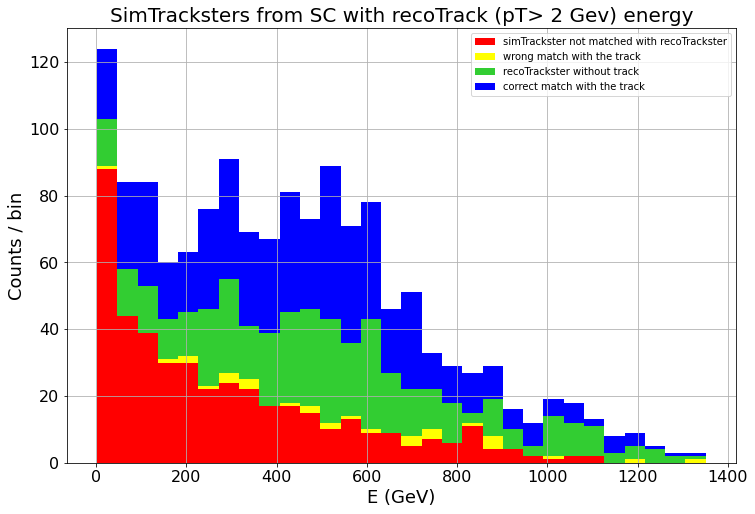

In [27]:
plt.figure(figsize=(12,8))
#plt.hist(all_energy, label="all", color="red", alpha=0.5, bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=False)
# plt.hist( label="not matched", color="orange", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)
# plt.hist(wrong_energy, label="wrong match", color="blue", histtype="step", bins=30, range=(min(min(all_energy), min(wrong_energy)), max(max(all_energy), max(wrong_energy))), stacked=True)

plt.hist([not_matched_energy, wrong_energy, recoTs_no_trk_energy, ok_energy],
         label=["simTrackster not matched with recoTrackster", "wrong match with the track", "recoTrackster without track", "correct match with the track"], 
         color=["red","yellow", "limegreen","blue"], 
         bins=30, 
         range=(min(all_energy), max(all_energy)), 
         stacked=True)

plt.grid()
plt.legend()
plt.title('SimTracksters from SC with recoTrack (pT> 2 Gev) energy')
plt.xlabel('E (GeV)', size=18)
plt.ylabel('Counts / bin', size=18)
plt.show()

In [48]:
for ev in range(1000): 
    print("-----")
    print("number of tracks ", len(SC_trackIdx[ev]))
    for s, tkIdx in enumerate(SC_trackIdx[ev]):
        if tkIdx == -1:
            continue # no reco track associated to simTrackster
        print(track_boundaryX[ev][s], track_boundaryY[ev][s], track_boundaryZ[ev][s])

-----
number of tracks  2
4.279149055480957 43.584266662597656 322.1549987792969
2.949558973312378 94.32184600830078 322.1549987792969
-----
number of tracks  2
4.995941638946533 67.84786987304688 322.1549987792969
3.2469587326049805 43.70561599731445 322.1549987792969
-----
number of tracks  2
-1.4289510250091553 77.94351196289062 322.1549987792969
4.594167232513428 47.06086730957031 322.1549987792969
-----
number of tracks  2
5.958561897277832 90.11504364013672 322.1549987792969
5.16290283203125 85.26441955566406 322.1549987792969
-----
number of tracks  2
22.177824020385742 109.85336303710938 322.1549987792969
3.69602108001709 60.62794876098633 322.1549987792969
-----
number of tracks  2
-2.6028051376342773 115.00859069824219 322.1549987792969
0.5862222909927368 54.29483413696289 322.1549987792969
-----
number of tracks  2
3.5696330070495605 83.00334167480469 322.1549987792969
20.889263153076172 118.6397476196289 322.1549987792969
-----
number of tracks  1
-999.0 -999.0 -999.0
-----

-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-----
number of tracks  2
8.932929992675781 90.980712890625 322.1549987792969
8.643804550170898 75.4113540649414 322.1549987792969
-----
number of tracks  2
11.627893447875977 86.87024688720703 322.1549987792969
11.217700958251953 65.66522979736328 322.1549987792969
-----
number of tracks  2
0.7520903944969177 105.1917724609375 322.1549987792969
16.23011589050293 100.99850463867188 322.1549987792969
-----
number of tracks  2
-1.5164512395858765 80.58487701416016 322.1549987792969
3.7867236137390137 48.23741912841797 322.1549987792969
-----
number of tracks  2
2.892686605453491 51.16407775878906 322.1549987792969
10.693949699401855 88.87018585205078 322.1549987792969
-----
number of tracks  1
-999.0 -999.0 -999.0
-----
number of tracks  2
2.939486265182495 44.6885986328125 322.1549987792969
-0.6116976737976074 45.33832550048828 322.1549987792969
-----
number of tracks  2
5.660709857940674 58.12583541870117 322.1549987792969
3.1680755615234375 73

13.574116706848145 115.75785827636719 322.1549987792969
1.8309749364852905 53.577354431152344 322.1549987792969
-----
number of tracks  2
2.4730489253997803 97.77827453613281 322.1549987792969
19.199871063232422 97.65157318115234 322.1549987792969
-----
number of tracks  2
3.945303201675415 52.12047576904297 322.1549987792969
6.447262763977051 72.6619644165039 322.1549987792969
-----
number of tracks  1
-999.0 -999.0 -999.0
-----
number of tracks  2
-0.5202346444129944 75.78820037841797 322.1549987792969
0.08911733329296112 53.53947830200195 322.1549987792969
-----
number of tracks  2
-1.188095211982727 45.13675308227539 322.1549987792969
9.351277351379395 53.77764129638672 322.1549987792969
-----
number of tracks  2
6.60621452331543 62.55099105834961 322.1549987792969
3.1380395889282227 95.936767578125 322.1549987792969
-----
number of tracks  2
7.357446193695068 110.39663696289062 322.1549987792969
6.022953033447266 47.747257232666016 322.1549987792969
-----
number of tracks  1
-999.

-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-----
number of tracks  2
-0.9193204641342163 58.87724304199219 322.1549987792969
4.529854774475098 56.20838928222656 322.1549987792969
-----
number of tracks  4
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-----
number of tracks  2
3.2774007320404053 90.82254791259766 322.1549987792969
-0.8571167588233948 55.05930709838867 322.1549987792969
-----
number of tracks  1
-999.0 -999.0 -999.0
-----
number of tracks  1
-999.0 -999.0 -999.0
-----
number of tracks  2
6.061120986938477 66.7822265625 322.1549987792969
10.728137016296387 111.53691864013672 322.1549987792969
-----
number of tracks  2
2.5104167461395264 65.20350646972656 322.1549987792969
5.498711585998535 56.634765625 322.1549987792969
-----
number of tracks  2
9.182880401611328 91.21044921875 322.1549987792969
-0.47185665369033813 45.508750915527344 322.1549987792969
-----
number of track

2.9752354621887207 43.41469955444336 322.1549987792969
4.235726833343506 58.26844024658203 322.1549987792969
-----
number of tracks  2
6.533411026000977 49.94626235961914 322.1549987792969
8.324458122253418 63.066566467285156 322.1549987792969
-----
number of tracks  2
0.6002363562583923 111.484375 322.1549987792969
8.166353225708008 55.9562873840332 322.1549987792969
-----
number of tracks  2
5.787474155426025 88.99457550048828 322.1549987792969
7.7281904220581055 82.78638458251953 322.1549987792969
-----
number of tracks  2
6.623920440673828 49.41181182861328 322.1549987792969
13.338475227355957 83.58409118652344 322.1549987792969
-----
number of tracks  1
-999.0 -999.0 -999.0
-----
number of tracks  13
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-----
number

-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
2.044560670852661 82.19978332519531 322.1549987792969
-----
number of tracks  2
7.630215167999268 46.958221435546875 322.1549987792969
0.8376782536506653 92.28971862792969 322.1549987792969
-----
number of tracks  1
-999.0 -999.0 -999.0
-----
number of tracks  2
0.27762168645858765 61.7859001159668 322.1549987792969
4.974417209625244 44.574825286865234 322.1549987792969
-----
number of tracks  2
-0.33548760414123535 72.32775115966797 322.1549987792969
14.700191497802734 110.47046661376953 322.1549987792969
-----
number of tracks  2
6.956152439117432 76.6630859375 322.1549987792969
12.286371231079102 71.49484252929688 322.1549987792969
-----
number of tracks  1
-999.0 -999.0 -999.0
-----
number of tracks  2
14.25710391998291 90.82685089111328 322.1549987792969
-2.6302871704101562 116.88592529296875 322.1549987792969
-----

2.276057243347168 70.73603820800781 322.1549987792969
-----
number of tracks  15
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-----
number of tracks  1
-999.0 -999.0 -999.0
-----
number of tracks  2
0.5837328433990479 45.8615837097168 322.1549987792969
7.147728443145752 43.636924743652344 322.1549987792969
-----
number of tracks  2
3.047133445739746 90.78398895263672 322.1549987792969
11.006367683410645 61.075706481933594 322.1549987792969
-----
number of tracks  8
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
76.70569610595703 33.20347213745117 322.1549987792969
-----
number of tracks  2
6.631171703338623 104.66796875 32

4.78162145614624 74.0826416015625 322.1549987792969
2.252429962158203 80.36772918701172 322.1549987792969
-----
number of tracks  2
-1.1109756231307983 94.00083923339844 322.1549987792969
-0.7161765694618225 45.243263244628906 322.1549987792969
-----
number of tracks  2
0.9151554107666016 54.33513259887695 322.1549987792969
10.312782287597656 64.59367370605469 322.1549987792969
-----
number of tracks  0
-----
number of tracks  2
14.54810619354248 102.39424133300781 322.1549987792969
1.7321950197219849 60.05689239501953 322.1549987792969
-----
number of tracks  2
4.111478328704834 79.9552230834961 322.1549987792969
3.1822292804718018 73.60357666015625 322.1549987792969
-----
number of tracks  14
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
--

-999.0 -999.0 -999.0
-----
number of tracks  2
10.777007102966309 90.97501373291016 322.1549987792969
6.41430139541626 57.47063064575195 322.1549987792969
-----
number of tracks  2
14.399127960205078 96.35066223144531 322.1549987792969
5.743321418762207 63.9924430847168 322.1549987792969
-----
number of tracks  2
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-----
number of tracks  2
2.2697341442108154 116.75911712646484 322.1549987792969
6.448153018951416 98.04264068603516 322.1549987792969
-----
number of tracks  2
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-----
number of tracks  2
14.251033782958984 106.16024017333984 322.1549987792969
1.82101571559906 61.62561798095703 322.1549987792969
-----
number of tracks  2
5.1697916984558105 51.18134307861328 322.1549987792969
10.181098937988281 79.15413665771484 322.1549987792969
-----
number of tracks  2
6.675912380218506 74.64848327636719 322.1549987792969
3.8793294429779053 43.08073425292969 322.1549987792969
-----
number of tracks  2
9.84014

-999.0 -999.0 -999.0
-----
number of tracks  2
-0.8662704229354858 64.20282745361328 322.1549987792969
3.7645530700683594 83.27108764648438 322.1549987792969
-----
number of tracks  1
-999.0 -999.0 -999.0
-----
number of tracks  2
12.421364784240723 73.7830581665039 322.1549987792969
6.569064140319824 50.40718078613281 322.1549987792969
-----
number of tracks  2
15.85436725616455 124.14221954345703 322.1549987792969
16.349899291992188 123.86963653564453 322.1549987792969
-----
number of tracks  1
-999.0 -999.0 -999.0
-----
number of tracks  2
-1.662573218345642 66.33753204345703 322.1549987792969
3.9244790077209473 53.76472473144531 322.1549987792969
-----
number of tracks  2
6.174282073974609 64.83524322509766 322.1549987792969
10.741706848144531 82.80106353759766 322.1549987792969
-----
number of tracks  0
-----
number of tracks  2
7.282132148742676 87.95731353759766 322.1549987792969
6.331829071044922 72.84017181396484 322.1549987792969
-----
number of tracks  1
-999.0 -999.0 -999.0

3.4321367740631104 99.14557647705078 322.1549987792969
4.965890884399414 43.63130187988281 322.1549987792969
-----
number of tracks  7
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-999.0 -999.0 -999.0
-----
number of tracks  2
-0.8224205374717712 115.16108703613281 322.1549987792969
7.056725978851318 84.25582122802734 322.1549987792969
-----
number of tracks  0
-----
number of tracks  2
11.103320121765137 77.67780303955078 322.1549987792969
13.719498634338379 86.09317779541016 322.1549987792969
-----
number of tracks  1
-999.0 -999.0 -999.0
-----
number of tracks  2
1.6519806385040283 52.71076202392578 322.1549987792969
7.87733268737793 112.14717102050781 322.1549987792969
-----
number of tracks  2
-0.649185836315155 106.06350708007812 322.1549987792969
4.271605968475342 92.74490356445312 322.1549987792969
-----
number of tracks  2
0.1793155074119568 90.966064453125 322.1549987792969
13.399473190307617 85.

## plots

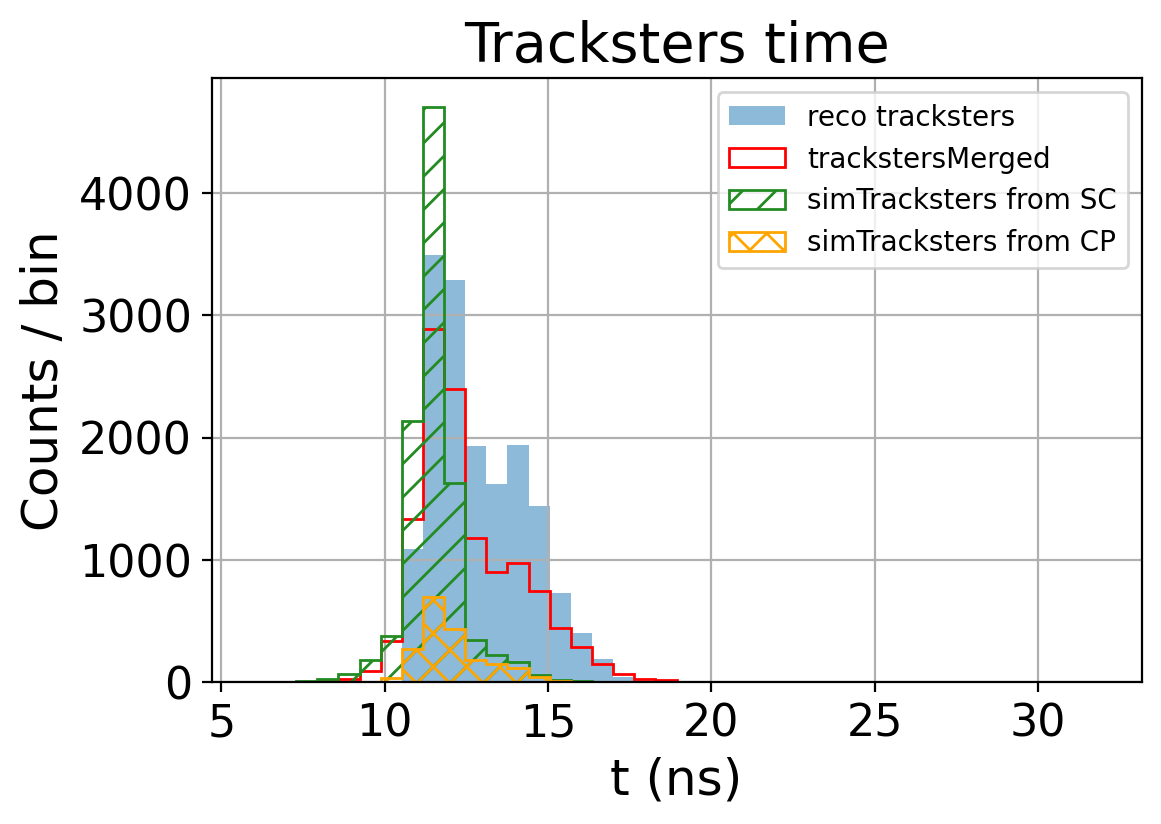

In [22]:
plt.figure(dpi=200)
rmin = min(ak.min(tracksters_CALO_time[tracksters_CALO_time>-99]), ak.min(trackstersMerged_CALO_time[trackstersMerged_CALO_time>-99]))
rmax = max(ak.max(tracksters_CALO_time[tracksters_CALO_time>-99]), ak.max(trackstersMerged_CALO_time[trackstersMerged_CALO_time>-99]))
plt.hist(ak.flatten(tracksters_CALO_time[tracksters_CALO_time>-99]), bins=40, alpha=.5, label="reco tracksters", range=(rmin,rmax))
plt.hist(ak.flatten(trackstersMerged_CALO_time[trackstersMerged_CALO_time>-99]), bins=40, color="red", histtype="step", label="trackstersMerged", range=(rmin,rmax))
plt.hist(ak.flatten(SC_CALO_time[SC_CALO_time>-99]), bins=40, color="forestgreen", histtype="step", label="simTracksters from SC", range=(rmin,rmax), hatch="//")
plt.hist(ak.flatten(CP_CALO_time[CP_CALO_time>-99]), bins=40, color="orange", histtype="step", label="simTracksters from CP", range=(rmin,rmax), hatch="XX")
plt.grid()
plt.legend()
plt.title('Tracksters time')
plt.xlabel('t (ns)', size=18)
plt.ylabel('Counts / bin', size=18)
plt.show()

In [223]:
massimo = max(ak.count(track_id, axis=1))
nphist(ak.count(track_id, axis=1), bins=massimo+1, title="number of tracks", xlabel="# tracks")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …